In [2]:
import pandas as pd
df = pd.read_csv('dataset/zomato.csv')

In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
paises = {
    'Country Code': [1,14,30,37,94,148,162,166,184,189,191,208,214,215,216],
    'Country':["India","Australia","Brazil","Canada","Indonesia","New Zeland","Philippines","Qatar","Singapure","South Africa","Sri Lanka","Turkey","United Arab Emirates","England","United States of America"]
}
paises=pd.DataFrame(paises)

In [5]:
df['Price range']= df['Price range'].replace({1: "cheap"})
df['Price range']= df['Price range'].replace({2: "normal"})
df['Price range']= df['Price range'].replace({3: "expensive"})
df['Price range']= df['Price range'].replace({4: "gourmet"})

In [6]:
cores = {
    'Rating color' : ["3F7E00","5BA829","9ACD32","CDD614" ,"FFBA00" ,"CBCBC8" ,"FF7800"],
    'R Color' : ["darkgreen","green","lightgreen","orange","red","darkred","darkred"]
}
cores= pd.DataFrame(cores)

In [7]:
#quantidade de vendas com e sem delivery
#qual tipo de ccuisine vende mais
df = pd.merge(df, cores, on='Rating color', how='inner')
df = pd.merge(df, paises, on='Country Code', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527 entries, 0 to 7526
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7527 non-null   int64  
 1   Restaurant Name       7527 non-null   object 
 2   Country Code          7527 non-null   int64  
 3   City                  7527 non-null   object 
 4   Address               7527 non-null   object 
 5   Locality              7527 non-null   object 
 6   Locality Verbose      7527 non-null   object 
 7   Longitude             7527 non-null   float64
 8   Latitude              7527 non-null   float64
 9   Cuisines              7512 non-null   object 
 10  Average Cost for two  7527 non-null   int64  
 11  Currency              7527 non-null   object 
 12  Has Table booking     7527 non-null   int64  
 13  Has Online delivery   7527 non-null   int64  
 14  Is delivering now     7527 non-null   int64  
 15  Switch to order menu 

In [8]:
df.iloc[0]
df.drop(columns=['Address', 'Locality','Locality Verbose','Country Code'], inplace=True)

In [9]:
df.drop_duplicates(keep='first', inplace=True) 
df.dropna(inplace=True)
df['Cuisines'] = df.loc[:,'Cuisines'].apply(lambda x: x.split(",")[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6929 entries, 0 to 7526
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         6929 non-null   int64  
 1   Restaurant Name       6929 non-null   object 
 2   City                  6929 non-null   object 
 3   Longitude             6929 non-null   float64
 4   Latitude              6929 non-null   float64
 5   Cuisines              6929 non-null   object 
 6   Average Cost for two  6929 non-null   int64  
 7   Currency              6929 non-null   object 
 8   Has Table booking     6929 non-null   int64  
 9   Has Online delivery   6929 non-null   int64  
 10  Is delivering now     6929 non-null   int64  
 11  Switch to order menu  6929 non-null   int64  
 12  Price range           6929 non-null   object 
 13  Aggregate rating      6929 non-null   float64
 14  Rating color          6929 non-null   object 
 15  Rating text           6929

# Perguntas de negócio

1. Quantos restaurantes únicos estão registrados?

In [13]:
len(df['Restaurant ID'].unique())

6929

2. Quantos países únicos estão registrados?

In [15]:
len(df['Country'].unique())

15

3. Quantas cidades únicas estão registradas?

In [17]:
len(df['City'].unique())

125

4. Qual o total de avaliações feitas?

In [19]:
df['Votes'].sum()

4194533

5. Qual o total de tipos de culinária registrados?

In [21]:
df['Cuisines'].nunique()

165

# Tab Países

1. Qual o nome do país que possui mais cidades registradas?

In [24]:
pais_mais_cidade =df[['Country','City']].groupby(['Country','City']).count().reset_index()
pais_mais_cidade['Country'].value_counts().to_frame().reset_index().iloc[0,0]
#count().to_frame('quantidade').reset_index()

'India'

2. Qual o nome do país que possui mais restaurantes registrados?

In [26]:
df['Country'].value_counts().to_frame().reset_index().iloc[0,0]

'India'

3. Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?

In [28]:
df[['Country','Price range']].loc[df['Price range']=='gourmet'].value_counts().to_frame('qtd').reset_index().iloc[0,0]

'United States of America'

4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

In [30]:
pais_mais_tipos = df[['Country','Cuisines']].groupby(['Country','Cuisines']).count().reset_index()
pais_mais_tipos['Country'].value_counts().to_frame().reset_index().iloc[0,0]
#.groupby('Country').nunique().sort_values('Cuisines', ascending=False).reset_index())

'India'

5. Qual o nome do país que possui a maior quantidade de avaliações feitas?

In [32]:
pais_mais_avaliacoes=df[['Country','Votes']].groupby(['Country','Votes']).count().reset_index()
pais_mais_avaliacoes['Country'].value_counts().to_frame().reset_index().iloc[0,0]
#pais_mais_avaliacoes.groupby(['Country'])['Votes'].sum()
#df[['Country','Votes']].groupby(['Country'])['Votes'].sum()

'India'

6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?


In [34]:
#pais_quant_delivery
pais_quant_delivery=df[['Country','Has Online delivery']].loc[df['Has Online delivery']== 1]
pais_quant_delivery['Country'].value_counts().to_frame().reset_index().iloc[0,0]

'India'

7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?

In [36]:
pais_quant_reserva=df[['Country','Has Table booking']].loc[df['Has Table booking']== 1]
pais_quant_reserva['Country'].value_counts().to_frame().reset_index().iloc[0,0]

'India'

8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?

In [38]:
df[['Country','Votes']].groupby(['Country'])['Votes'].mean().reset_index().sort_values('Votes', ascending=False).iloc[0,0]
#(df.loc[:, ['Votes', 'Country'] ].groupby('Country').mean().sort_values('Votes', ascending=False).reset_index())

'Indonesia'

9. Qual o nome do país que possui, na média, a maior nota média registrada?

In [40]:
df[['Country','Aggregate rating']].groupby(['Country'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating', ascending=False).iloc[0,0]

'Indonesia'

10. Qual o nome do país que possui, na média, a menor nota média registrada?

In [42]:
df[['Country','Aggregate rating']].groupby(['Country'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating', ascending=True).iloc[0,0]

'Brazil'

11. Qual a média de preço de um prato para dois por país?

In [44]:
media_pra_dois=df[['Country','Average Cost for two']].groupby(['Country'])['Average Cost for two'].mean().to_frame('mean').reset_index()

# Cidade

1. Qual o nome da cidade que possui mais restaurantes registrados?

In [47]:
df[['City','Restaurant ID']].groupby(['City'])['Restaurant ID'].count().reset_index().sort_values('Restaurant ID', ascending=False).iloc[0,0]
#df['City'].value_counts()
#.value_counts()
#(df.loc[:, ['Restaurant ID', 'City'] ].groupby('City').count().sort_values('Restaurant ID', ascending=False).reset_index())

'Abu Dhabi'

2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

In [49]:
df[['City','Aggregate rating']].loc[df['Aggregate rating'] > 4].groupby(['City'])['Aggregate rating'].count().reset_index().sort_values('Aggregate rating', ascending=False).iloc[0,0]

'Bangalore'

3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

In [51]:
df[['City','Aggregate rating']].loc[df['Aggregate rating'] < 2.5].groupby(['City'])['Aggregate rating'].count().reset_index().sort_values('Aggregate rating', ascending=False).iloc[0,0]

'Gangtok'

4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?

In [53]:
df[['City','Average Cost for two']].groupby(['City'])['Average Cost for two'].mean().to_frame('mean').reset_index().sort_values('mean', ascending=False).iloc[0,0]

'Adelaide'

5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?

In [55]:
df[['City','Cuisines']].groupby(['City','Cuisines']).count().reset_index().value_counts('City').reset_index().iloc[0,0]

'Birmingham'

6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?

In [57]:
df[['City','Has Table booking']].loc[df['Has Table booking'] == 1].value_counts('City').reset_index().iloc[0,0]

'Bangalore'

7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

In [59]:
df[['City','Is delivering now']].loc[df['Is delivering now'] == 1].value_counts('City').reset_index().iloc[0,0]

'Vadodara'

8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

In [61]:
df[['City','Has Online delivery']].loc[df['Has Online delivery'] == 1].value_counts('City').reset_index().iloc[0,0]

'Bhopal'

# Restaurantes

1. Qual o nome do restaurante que possui a maior quantidade de avaliações?

In [64]:
df[['Restaurant Name','Votes']].sort_values('Votes', ascending=False).iloc[0,0]

'Bawarchi'

2. Qual o nome do restaurante com a maior nota média?

In [66]:
#df['Restaurant Name'].duplicated().sum()
#df[['Restaurant Name','Aggregate rating']].groupby(['Restaurant Name'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating', ascending=False).iloc[0,0]
df[['Restaurant Name','Aggregate rating']].sort_values('Aggregate rating', ascending=False).iloc[0,0]

'The Purple Pig'

3. Qual o nome do restaurante que possui o maior valor de uma prato para duas pessoas?

In [68]:
df[['Restaurant Name','Average Cost for two']].sort_values('Average Cost for two', ascending=False).iloc[0,0]

"d'Arry's Verandah Restaurant"

4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

In [70]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[df['Cuisines']=='Brazilian'].sort_values('Aggregate rating').iloc[0,0]

'NAVE MÃE FAST FOOD GOURMET'

5. Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?

In [72]:
df[['Country','Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines']=='Brazilian') & (df['Country']=='Brazil')].sort_values('Aggregate rating', ascending=False).iloc[0,1]

'Braseiro da Gávea'

6. Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

In [74]:
df[['Has Online delivery','Votes']].groupby(['Has Online delivery'])['Votes'].mean().reset_index()

Has Online delivery       Votes
0                    0  479.421018
1                    1  838.821664

7. Os restaurantes que fazem reservas são também, na média, os restaurantes que possuem o maior valor médio de um prato para duas pessoas?

In [76]:
df[['Has Table booking','Average Cost for two']].groupby(['Has Table booking'])['Average Cost for two'].mean()

Has Table booking
0     3488.596866
1    69998.423810
Name: Average Cost for two, dtype: float64

8. Os restaurantes do tipo de culinária japonesa dos Estados Unidos da América possuem um valor médio de prato para duas pessoas maior que as churrascarias americanas (BBQ)?

In [78]:
#df['Cuisines'].unique().tolist()
#df['Country'].unique().tolist()

In [79]:
df[['Restaurant ID','Country','Cuisines','Average Cost for two']].loc[((df['Cuisines']=='Japanese') | (df['Cuisines']=='BBQ')) & (df['Country']=='United States of America')].groupby(['Cuisines'])['Average Cost for two'].mean()

Cuisines
BBQ         39.642857
Japanese    56.406250
Name: Average Cost for two, dtype: float64

Tipos de Culinária


1. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a maior média de avaliação?

In [82]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'Italian')].sort_values('Aggregate rating', ascending=False).iloc[0,0]

"Andre's Cucina & Polenta Bar"

2. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?

In [84]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'Italian')].sort_values('Aggregate rating').iloc[0,0]

'Le Delicatezze Di Bruno'

3. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?

In [86]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'American')].sort_values('Aggregate rating', ascending=False).iloc[0,0]

'OEB Breakfast Co.'

4. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação?

In [88]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'American')].sort_values('Aggregate rating').iloc[0,0]

'Alston Bar & Beef'

5. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?

In [90]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'Arabian')].sort_values('Aggregate rating', ascending=False).iloc[0,0]

'Mandi@36'

6. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?

In [92]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'Arabian')].sort_values('Aggregate rating').iloc[0,0]

'Raful'

7. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a maior média de avaliação?

In [94]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'Japanese')].sort_values('Aggregate rating', ascending=False).iloc[0,0]

'Sushi Leblon'

8. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação?

In [96]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'Japanese')].sort_values('Aggregate rating').iloc[0,0]

'Banzai Sushi'

9. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?

In [98]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'Home-made')].sort_values('Aggregate rating', ascending=False).iloc[0,0]

'Kanaat Lokantası'

10. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?

In [100]:
df[['Restaurant Name','Cuisines','Aggregate rating']].loc[(df['Cuisines'] == 'Home-made')].sort_values('Aggregate rating').iloc[0,0]

'GurMekan Restaurant'

11. Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?

In [102]:
df[['Cuisines','Average Cost for two']].groupby(['Cuisines'])['Average Cost for two'].mean().reset_index().sort_values('Average Cost for two', ascending=False).iloc[0,0]

'Modern Australian'

12. Qual o tipo de culinária que possui a maior nota média?

In [104]:
df[['Cuisines','Aggregate rating']].groupby(['Cuisines']).max().sort_values('Aggregate rating', ascending=False).reset_index().iloc[0,0]

'Indian'

13. Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?

In [106]:
df[['Cuisines','Has Online delivery', 'Is delivering now']].loc[(df['Has Online delivery'] == 1) & (df['Is delivering now'] == 1)].value_counts('Cuisines').reset_index().iloc[0,0]
#.groupby(['Cuisines'])['Cuisines'].count()


'North Indian'

I want to make a dashboard with 2 pages, one with the strategic vision and the other with the planning vision using this df, give me ideas of what to put on the dashboard and insights that I can have

What can't be missing from this dashboard?

<h1> Página 1: Países </h1>

Aba 1: Visão Estratégica


Distribuição de Restaurantes por País:

    -Gráfico de barras ou mapa de calor mostrando o número de restaurantes por país.

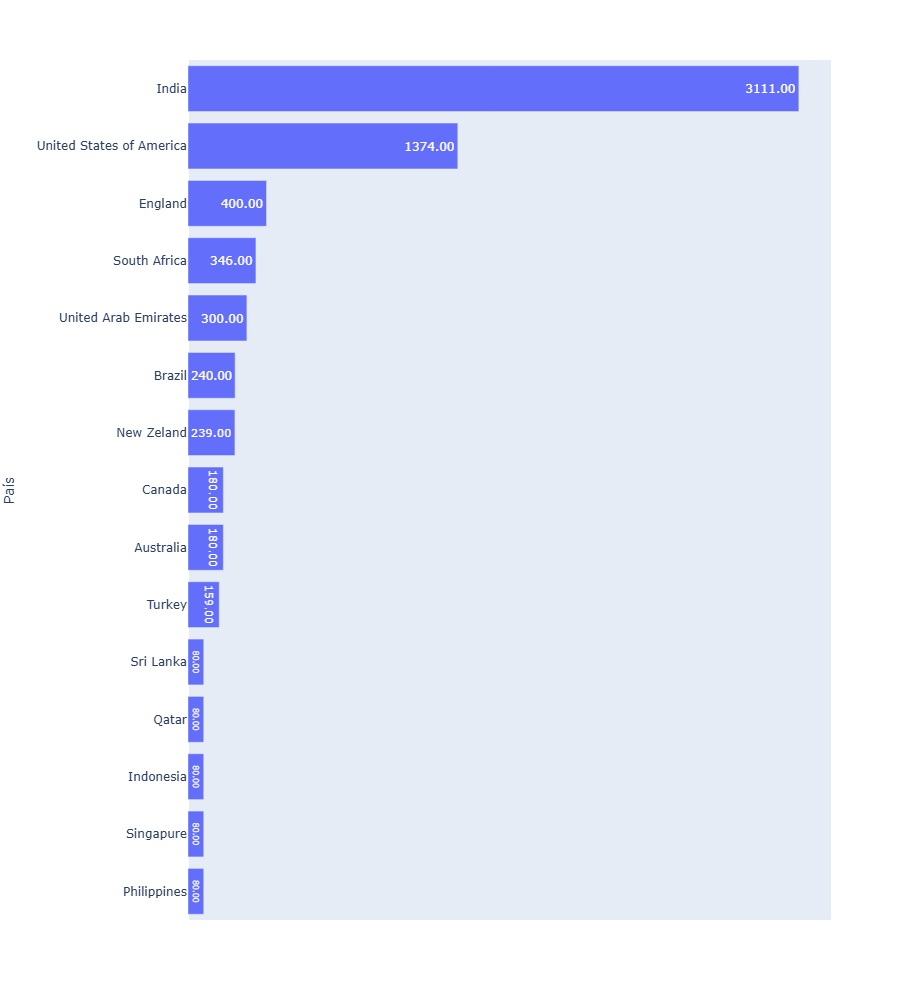

In [112]:
import plotly.express as px
restaurantes_por_pais = df['Country'].value_counts().reset_index()
fig = px.bar(
    restaurantes_por_pais, 
    x="count", 
    y="Country", 
    text='count',
    labels={
        'Country': 'País',
        'count' : ' '
    }
)
fig.update_traces(textposition='inside',texttemplate='%{text:.2f}')
fig.update_xaxes(showticklabels=False,showgrid=False)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=1000)

fig.show()

Média de Avaliação por País:

    -Gráfico de barras comparando as médias de avaliação (Aggregate rating) por país.

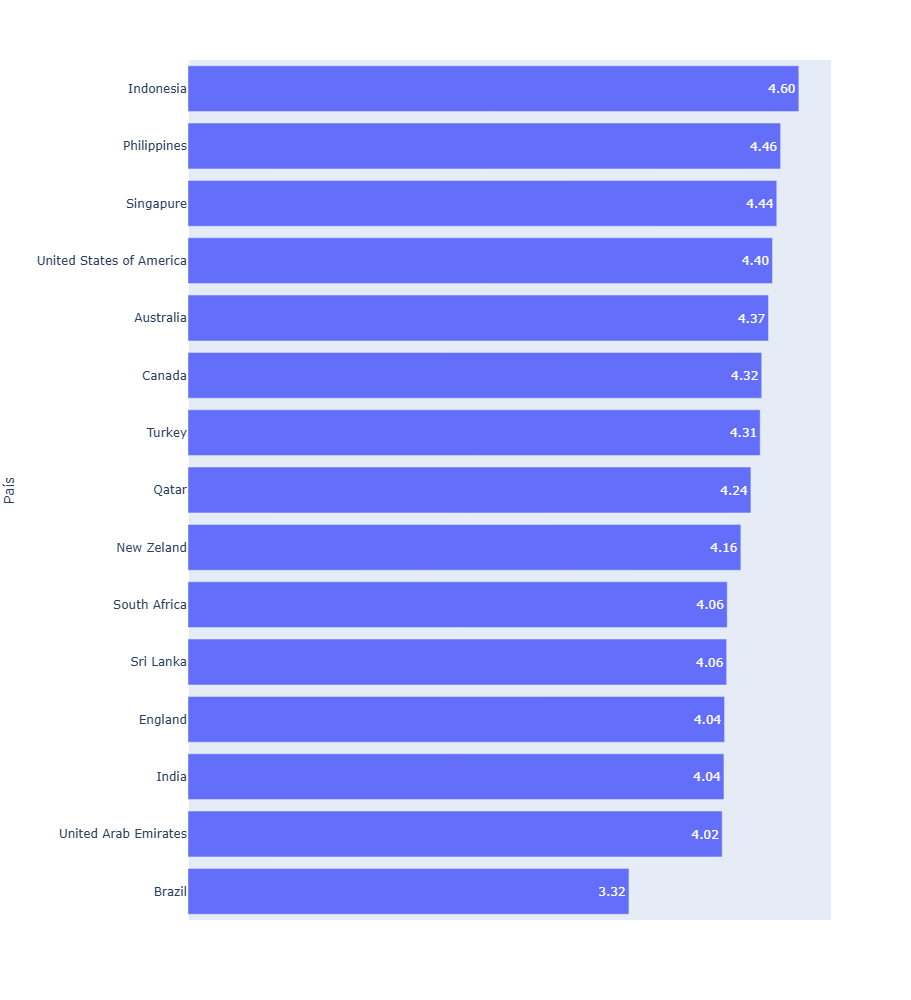

In [114]:
avaliacao_por_pais = df[['Country', 'Aggregate rating']].groupby(['Country'])['Aggregate rating'].mean().reset_index()
fig = px.bar(
    avaliacao_por_pais, 
    x="Aggregate rating", 
    y="Country", 
    text='Aggregate rating',
    labels={
        'Country': 'País',
        'Aggregate rating' : ' '
    }
)
fig.update_traces(textposition='inside',texttemplate='%{text:.2f}')
fig.update_xaxes(showticklabels=False,showgrid=False)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=1000)

fig.show()

Custo Médio para Dois por País:

    -Gráfico de barras ou box plot mostrando a variação de custos médios por país.

In [116]:
media_dois=df[['Country', 'Average Cost for two']].groupby(['Country'])['Average Cost for two'].agg(['max', 'mean']).reset_index()
#media_dois=df[['Country', 'Average Cost for two']]
#df.drop(media_dois.loc[media_dois['Average Cost for two'] == media_dois['Average Cost for two'].max()].index, inplace=True)
#df.drop(media_dois.loc[media_dois['Average Cost for two'] == media_dois['Average Cost for two'].max()].index, inplace=True)
#fig = px.box(media_dois, x='Country', y='Average Cost for two', height=550)
#fig.show()
#media_dois = df[['Country', 'Average Cost for two']].groupby(['Country'])['Average Cost for two'].agg(['max', 'mean']).reset_index()
#fig = px.bar(media_dois, x='Country', y='mean', barmode='group',
             #error_y='max', title='Average Time and Standard Deviation by City and Type of Order',
             #labels={'avg_time': 'Average Time', 'City': 'City', 'Type_of_order': 'Type of Order'}, 
             #color_discrete_sequence=px.colors.qualitative.Prism
            #)
#fig.update_traces(marker_line_color='rgb(8,48,107)',
                  #marker_line_width=1.5)


Tipos de Culinária Populares por País:

    -Gráfico de treemap ou gráfico de barras mostrando os tipos de culinária mais comuns em cada país.

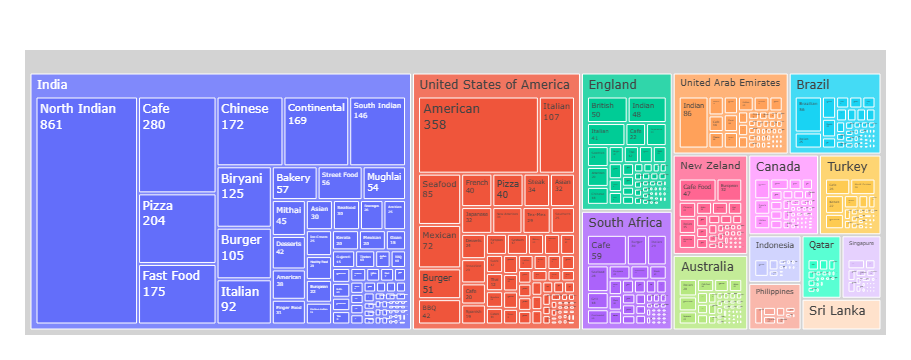

In [118]:
df_aux=df[['Country', 'Cuisines']].groupby(['Country','Cuisines'])['Cuisines'].count().to_frame('count').reset_index()
#df_aux.loc[df_aux['Country']=='Brazil']
#df[['Country', 'Cuisines']].groupby(['Country'])['Cuisines'].agg(pd.Series.mode)
import plotly.express as px
fig = px.treemap(df_aux, path=['Country', 'Cuisines'], values='count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.data[0].textinfo = 'label+text+value'
fig.show()

Aba 2: Visão de Planejamento

Potencial de Crescimento por País:

    -Matriz de crescimento baseada em número de restaurantes e avaliação média.
    
1. Calcular Métricas:

    1. Contar o número total de restaurantes por região (país, cidade ou tipo de culinária).
    2. Calcular a média de avaliações (Aggregate rating) para cada região.


2. Classificar as Regiões:

    Dividir as regiões em quatro quadrantes com base nas duas métricas: número de restaurantes e média de avaliações.
    Por exemplo:
    
    1. Alta Avaliação, Muitos Restaurantes: Forte mercado consolidado.
    2. Alta Avaliação, Poucos Restaurantes: Potencial de crescimento.
    3. Baixa Avaliação, Muitos Restaurantes: Necessidade de melhorias.
    4. Baixa Avaliação, Poucos Restaurantes: Baixo potencial/alto risco.
    
3. Matriz de Crescimento:

    1. Identificar mercados saturados ou emergentes.
    2. Planejar investimentos em regiões com alto potencial de crescimento (alta avaliação, poucos restaurantes).    

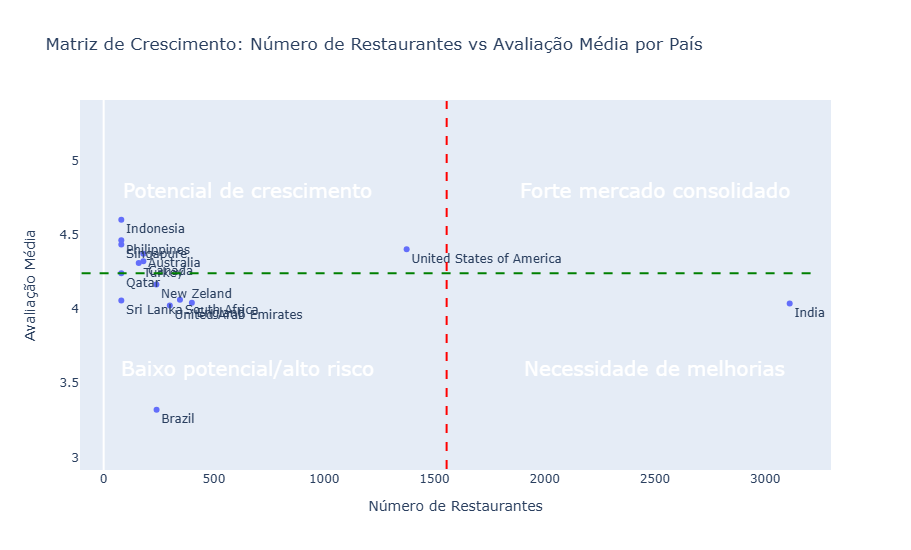

In [121]:
#grouped_df=df[['Country','Aggregate rating']].groupby(['Country'])[['Aggregate rating','Country']].agg({'Country': 'count','Aggregate rating': 'mean'}).rename(columns={'Country':'count'}).reset_index()
# Supondo que o dataset seja carregado em um DataFrame chamado df
# Agrupar por país e calcular as métricas

# Renomear colunas
grouped_df = df.groupby('Country').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean'
}).reset_index()

# Renomear colunas
grouped_df.columns = ['Country', 'Number of Restaurants', 'Average Rating']

# Criar o gráfico de dispersão com Plotly
fig = px.scatter(
    grouped_df,
    x='Number of Restaurants',
    y='Average Rating',
    text='Country',
    title='Matriz de Crescimento: Número de Restaurantes vs Avaliação Média por País',
    labels={
        'Number of Restaurants': 'Número de Restaurantes',
        'Average Rating': 'Avaliação Média'
    },
    height=550,
    template='plotly',
    hover_data={'Country': True}
)

# Adicionar linhas de referência (médias)
avg_num_restaurants = grouped_df['Number of Restaurants'].mean()
avg_rating = grouped_df['Average Rating'].mean()

fig.add_shape(
    type='line',
    x0=avg_num_restaurants, x1=avg_num_restaurants,
    y0=grouped_df['Average Rating'].min(), y1=grouped_df['Average Rating'].max(),
    line=dict(dash='dash', color='Red'),
    name='Média do Número de Restaurantes'
)

fig.add_shape(
    type='line',
    x0=grouped_df['Number of Restaurants'].min(), x1=grouped_df['Number of Restaurants'].max(),
    y0=avg_rating, y1=avg_rating,
    line=dict(dash='dash', color='Green'),
    name='Média das Avaliações'
)

# Atualizar layout para adicionar legenda
fig.update_layout(
    shapes=[
        dict(
            type='line',
            x0=grouped_df['Number of Restaurants'].min() * 19.44, x1=grouped_df['Number of Restaurants'].max() / 2,
            y0=grouped_df['Average Rating'].min() - 0.4, y1=grouped_df['Average Rating'].max() + 0.8,
            line=dict(dash='dash', color='Red'),
        ),
        dict(
            type='line',
            x0=grouped_df['Number of Restaurants'].min() - 180, x1=grouped_df['Number of Restaurants'].max() + 100,
            y0=grouped_df['Average Rating'].median(), y1=grouped_df['Average Rating'].median(),
            line=dict(dash='dash', color='Green'),
        )
    ],
    
    
)
fig.add_annotation(
    x=650, y=4.8,
    text='Potencial de crescimento', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=2500, y=4.8,
    text='Forte mercado consolidado', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=650, y=3.6,
    text='Baixo potencial/alto risco', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=2500, y=3.6,
    text='Necessidade de melhorias', 
    showarrow=False, 
    arrowhead=1, 
    arrowsize=1, 
    arrowwidth=2, 
    font=dict(size=20, color="white")
)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')
# Mostrar o gráfico
fig.show()

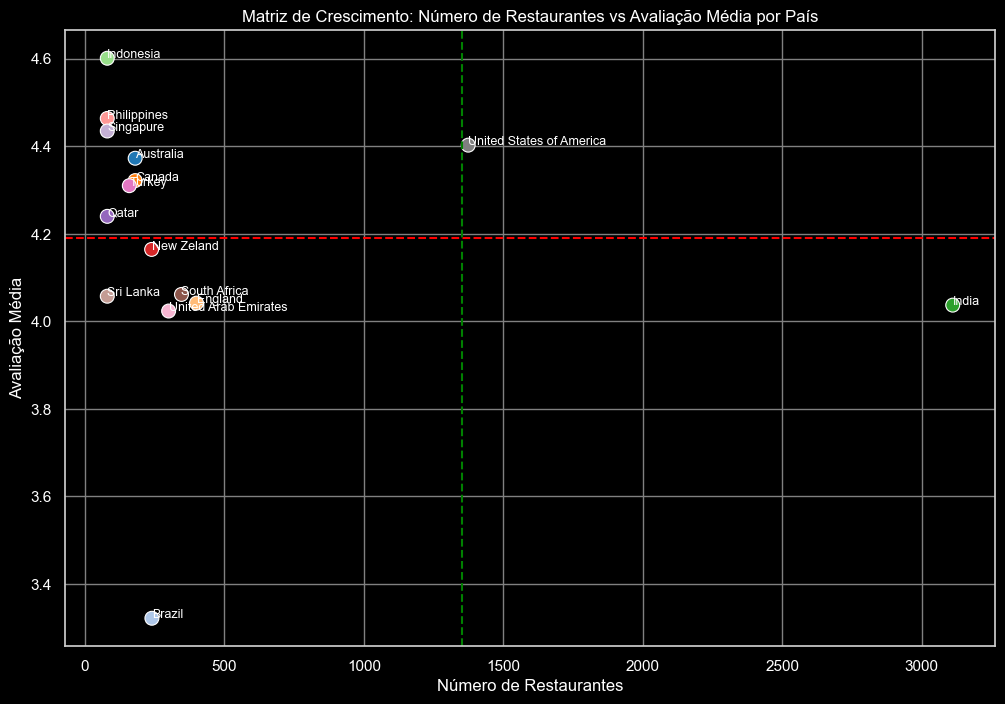

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que o dataset seja carregado em um DataFrame chamado df
# Agrupar por país e calcular as métricas
grouped_df = df.groupby('Country').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean'
}).reset_index()

# Renomear colunas
grouped_df.columns = ['Country', 'Number of Restaurants', 'Average Rating']

# Calcular as médias
avg_num_restaurants = grouped_df['Number of Restaurants'].mean()
avg_rating = grouped_df['Average Rating'].mean()

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de dispersão com Seaborn
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=grouped_df, x='Number of Restaurants', y='Average Rating', hue='Country', palette='tab20', s=100)

# Adicionar linhas de referência (mudar a posição da linha vermelha para uma nova média hipotética)
plt.axhline(y=avg_rating, color='red', linestyle='--', label='Linha de Referência')
plt.axvline(x=avg_num_restaurants + 890, color='green', linestyle='--', label='Média do Número de Restaurantes  (Ajustada)')

# Adicionar rótulos para alguns pontos específicos
for i in range(grouped_df.shape[0]):
    plt.text(grouped_df['Number of Restaurants'][i] + 0.1, grouped_df['Average Rating'][i], grouped_df['Country'][i], fontsize=9, color='white')

# Configurações finais do gráfico
plt.title('Matriz de Crescimento: Número de Restaurantes vs Avaliação Média por País', color='white')
plt.xlabel('Número de Restaurantes', color='white')
plt.ylabel('Avaliação Média', color='white')

# Remover a legenda
ax.legend_.remove()

# Mudar a cor de fundo do gráfico para preto
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.grid(True, color='gray')

# Mudar cor dos eixos e labels para branco
ax.tick_params(colors='white')

plt.show()


Análise de Competição:

    -Gráfico de dispersão mostrando a relação entre o número de restaurantes e a avaliação média em cada país.

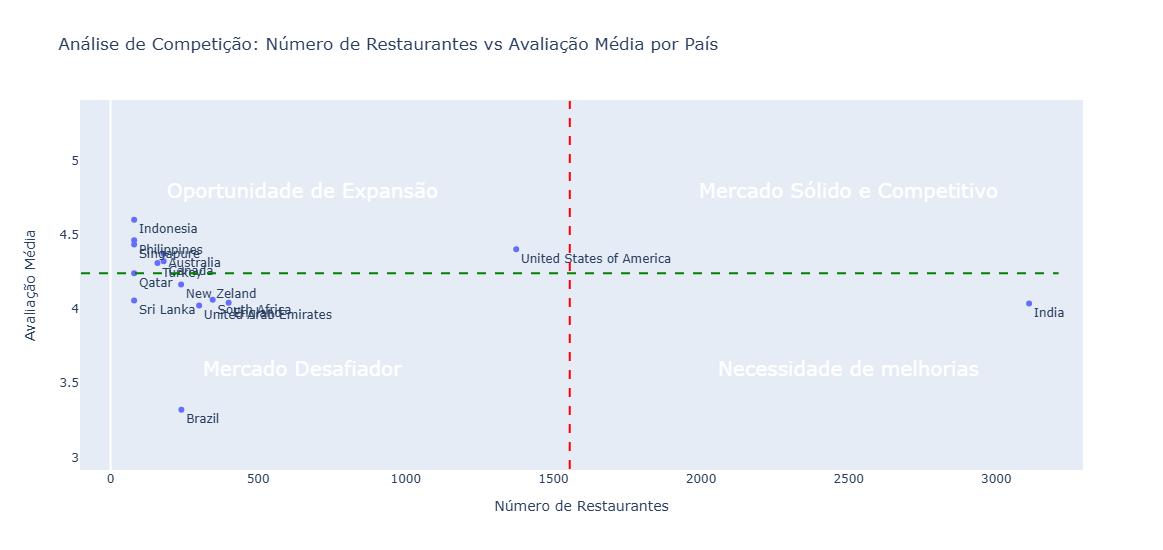

In [124]:
competicao=df[['Country','Aggregate rating']].groupby(['Country'])[['Aggregate rating','Country']].agg({'Country': 'count','Aggregate rating': 'mean'}).rename(columns={'Country':'count'}).reset_index()
fig = px.scatter(competicao, x="count", y="Aggregate rating")
competicao.columns = ['Country', 'Number of Restaurants', 'Average Rating']

# Criar o gráfico de dispersão com Plotly
fig = px.scatter(
    competicao,
    x='Number of Restaurants',
    y='Average Rating',
    text='Country',
    title='Análise de Competição: Número de Restaurantes vs Avaliação Média por País',
    labels={
        'Number of Restaurants': 'Número de Restaurantes',
        'Average Rating': 'Avaliação Média'
    },
    height=550,
    template='plotly',
    hover_data={'Country': True}
)

# Adicionar linhas de referência (médias)
avg_num_restaurants = competicao['Number of Restaurants'].mean()
avg_rating = competicao['Average Rating'].mean()

fig.add_shape(
    type='line',
    x0=avg_num_restaurants, x1=avg_num_restaurants,
    y0=competicao['Average Rating'].min(), y1=competicao['Average Rating'].max(),
    line=dict(dash='dash', color='Red'),
    name='Média do Número de Restaurantes'
)

fig.add_shape(
    type='line',
    x0=competicao['Number of Restaurants'].min(), x1=competicao['Number of Restaurants'].max(),
    y0=avg_rating, y1=avg_rating,
    line=dict(dash='dash', color='Green'),
    name='Média das Avaliações'
)

# Atualizar layout para adicionar legenda
fig.update_layout(
    shapes=[
        dict(
            type='line',
            x0=competicao['Number of Restaurants'].min() * 19.44, x1=competicao['Number of Restaurants'].max() / 2,
            y0=competicao['Average Rating'].min() - 0.4, y1=competicao['Average Rating'].max() + 0.8,
            line=dict(dash='dash', color='Red'),
        ),
        dict(
            type='line',
            x0=competicao['Number of Restaurants'].min() - 180, x1=competicao['Number of Restaurants'].max() + 100,
            y0=competicao['Average Rating'].median(), y1= competicao['Average Rating'].median(),
            line=dict(dash='dash', color='Green'),
        )
    ],
    
    
)
fig.add_annotation(
    x=650, y=4.8,
    text='Oportunidade de Expansão', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=2500, y=4.8,
    text='Mercado Sólido e Competitivo', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=650, y=3.6,
    text='Mercado Desafiador', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=2500, y=3.6,
    text='Necessidade de melhorias', 
    showarrow=False, 
    arrowhead=1, 
    arrowsize=1, 
    arrowwidth=2, 
    font=dict(size=20, color="white")
)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')
# Mostrar o gráfico
fig.show()

Custo vs Avaliação por País:

    -Gráfico de dispersão comparando o custo médio para dois e a avaliação média.

In [126]:
import numpy as np
custo_vs_avaliação_por_país=df[['Country','Aggregate rating','Average Cost for two']].groupby(['Country'])[['Aggregate rating','Average Cost for two']].mean().reset_index()
custo_vs_avaliação_por_país[['Aggregate rating','Average Cost for two']] = np.round(custo_vs_avaliação_por_país[['Aggregate rating','Average Cost for two']],decimals=2)
#Sem outliers
custo_vs_avaliação_por_país.drop(custo_vs_avaliação_por_país.loc[custo_vs_avaliação_por_país['Average Cost for two'] == custo_vs_avaliação_por_país['Average Cost for two'].max()].index, inplace=True)


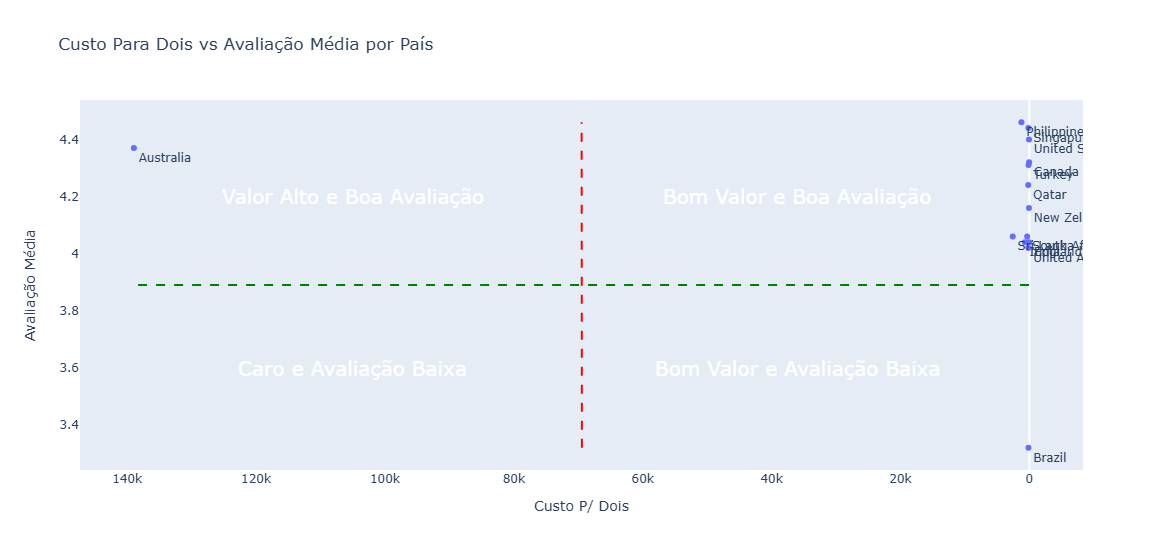

In [127]:
#fig = px.scatter(custo_vs_avaliação_por_país, x="Average Cost for two", y="Aggregate rating")
custo_vs_avaliação_por_país=df[['Country','Aggregate rating','Average Cost for two']].groupby(['Country'])[['Aggregate rating','Average Cost for two']].mean().reset_index()
custo_vs_avaliação_por_país[['Aggregate rating','Average Cost for two']] = np.round(custo_vs_avaliação_por_país[['Aggregate rating','Average Cost for two']],decimals=2)
#Sem outliers
custo_vs_avaliação_por_país.drop(custo_vs_avaliação_por_país.loc[custo_vs_avaliação_por_país['Average Cost for two'] == custo_vs_avaliação_por_país['Average Cost for two'].max()].index, inplace=True)


fig = px.scatter(
    custo_vs_avaliação_por_país, 
    x="Average Cost for two", 
    y="Aggregate rating",
    text='Country',
    title='Custo Para Dois vs Avaliação Média por País',
    labels={
        'Average Cost for two': 'Custo P/ Dois',
        'Aggregate rating': 'Avaliação Média'
    },
    height=550,
    template='plotly',
    hover_data={'Country': True}
)

# Adicionar linhas de referência (médias)
avg_num_restaurants = custo_vs_avaliação_por_país['Average Cost for two'].mean()
avg_rating = custo_vs_avaliação_por_país['Aggregate rating'].mean()

fig.add_shape(
    type='line',
    x0=(custo_vs_avaliação_por_país['Average Cost for two'].max() / 2)-custo_vs_avaliação_por_país['Average Cost for two'].min(), x1=custo_vs_avaliação_por_país['Average Cost for two'].max() / 2,
    y0=custo_vs_avaliação_por_país['Aggregate rating'].min(), y1=custo_vs_avaliação_por_país['Aggregate rating'].max(),
    line=dict(dash='dash', color='Red'),
    name='Média do Número de Restaurantes'
)

fig.add_shape(
    type='line',
    x0=custo_vs_avaliação_por_país['Average Cost for two'].min(), x1=custo_vs_avaliação_por_país['Average Cost for two'].max(),
    y0=(custo_vs_avaliação_por_país['Aggregate rating'].max() + custo_vs_avaliação_por_país['Aggregate rating'].min()) / 2, y1=(custo_vs_avaliação_por_país['Aggregate rating'].max() + custo_vs_avaliação_por_país['Aggregate rating'].min()) / 2,
    line=dict(dash='dash', color='Green'),
    name='Média das Avaliações'
)
fig.add_annotation(
    x=105000, y=4.2,
    text='Valor Alto e Boa Avaliação', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=36000, y=4.2,
    text='Bom Valor e Boa Avaliação', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=105000, y=3.6,
    text='Caro e Avaliação Baixa', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=36000, y=3.6,
    text='Bom Valor e Avaliação Baixa', 
    showarrow=False, 
    arrowhead=1, 
    arrowsize=1, 
    arrowwidth=2, 
    font=dict(size=20, color="white")
)
fig.update_xaxes(showgrid=False, autorange='reversed')
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')
fig.show()

In [128]:
#(custo_vs_avaliação_por_país['Average Cost for two'].max() / 2)


Capacidade de Atendimento:

    -Análise de capacidade de atendimento baseada na disponibilidade de reservas de mesa e entregas online por país.
    
    -Identificar tipos de culinária com baixa oferta de reservas de mesa ou entregas online e potencial de melhoria.
    
    -Planejar melhorias logísticas para aumentar a capacidade de atendimento e satisfação do cliente.    

In [130]:
#df['atendimento'] = df['Has Table booking'] + df['Has Online delivery']
#df['atendimento'].value_counts()
#capacidade_atendimento['indice'] = (capacidade_atendimento['Aggregate rating']*0.5)+(capacidade_atendimento['Has Table booking'] * 0.25 + capacidade_atendimento['Has Online delivery'] * 0.25)


In [131]:
capacidade_atendimento = df[['Country','Aggregate rating','Has Table booking','Has Online delivery']].groupby(['Country'])[['Aggregate rating','Has Table booking','Has Online delivery','Country']].agg({'Country': 'count','Has Table booking': 'sum','Has Online delivery': 'sum','Aggregate rating':'mean'}).rename(columns={'Country':'count'}).reset_index()
capacidade_atendimento['indice'] = (capacidade_atendimento['Has Table booking'] * 0.5 + capacidade_atendimento['Has Online delivery'] * 0.5)
capacidade_atendimento

Country  count  Has Table booking  Has Online delivery  \
0                  Australia    180                 29                    0   
1                     Brazil    240                  0                    0   
2                     Canada    180                  0                    0   
3                    England    400                 55                    0   
4                      India   3111                256                 2177   
5                  Indonesia     80                 14                    0   
6                 New Zeland    239                 19                    0   
7                Philippines     80                 22                    9   
8                      Qatar     80                  4                   37   
9                  Singapure     80                  0                    0   
10              South Africa    346                  3                    0   
11                 Sri Lanka     80                  1                    0   
12                    Turkey    159                  4                    0   
13      United Arab Emirates    300                 10                  205   
14  United States of America   1374                  3                    0   

    Aggregate rating  indice  
0           4.372778    14.5  
1           3.321667     0.0  
2           4.321667     0.0  
3           4.041750    27.5  
4           4.037126  1216.5  
5           4.601250     7.0  
6           4.164435     9.5  
7           4.463750    15.5  
8           4.240000    20.5  
9           4.435000     0.0  
10          4.061561     1.5  
11          4.057500     0.5  
12          4.310063     2.0  
13          4.023667   107.5  
14          4.402693     1.5

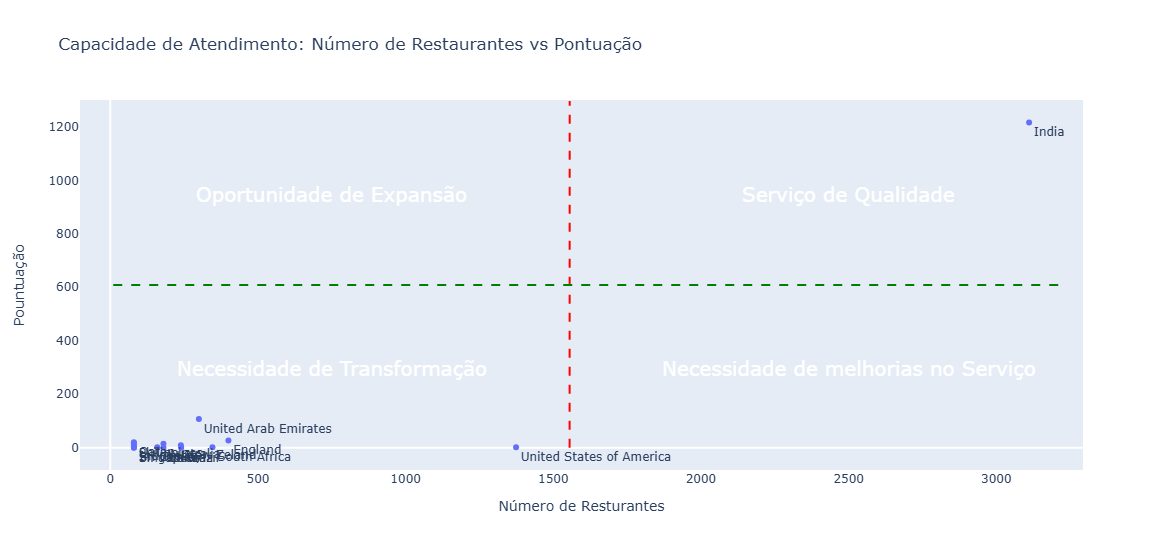

In [132]:
fig = px.scatter(
            capacidade_atendimento, 
            x="count", 
            y="indice",
            text='Country',
            title='Capacidade de Atendimento: Número de Restaurantes vs Pontuação',
            labels={
                'count': 'Número de Resturantes',
                'indice': 'Pountuação'
            },
            height=550,
            template='plotly',
            hover_data={'Country': True}
        )


fig.add_shape(
            type='line',
            x0=capacidade_atendimento['count'].min() * 19.44, x1=capacidade_atendimento['count'].max() / 2,
            y0=capacidade_atendimento['indice'].min(), y1=capacidade_atendimento['indice'].max() + 80,
            line=dict(dash='dash', color='Red'),
        )

fig.add_shape(
            type='line',
            x0=capacidade_atendimento['count'].min() -70, x1=capacidade_atendimento['count'].max() + 100,
            y0=capacidade_atendimento['indice'].min() + 608.25 , y1=capacidade_atendimento['indice'].max() / 2,
            line=dict(dash='dash', color='Green'),
        )

fig.add_annotation(
    x=750, y=950,
    text='Oportunidade de Expansão', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=2500, y=950,
    text='Serviço de Qualidade', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=750, y=300,
    text='Necessidade de Transformação', 
    showarrow=False, 
    font=dict(size=20, color="white")
)
fig.add_annotation(
    x=2500, y=300,
    text='Necessidade de melhorias no Serviço', 
    showarrow=False, 
    arrowhead=1, 
    arrowsize=1, 
    arrowwidth=2, 
    font=dict(size=20, color="white")
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')
fig.show()

In [133]:
#Pontuação custo benefício com atendimento + custo p dois

In [134]:
df[['City', 'Cuisines']].groupby(['City','Cuisines'])['Cuisines'].count().to_frame('count').reset_index()

City         Cuisines  count
0     Abu Dhabi         American      4
1     Abu Dhabi          Arabian      1
2     Abu Dhabi            Asian      1
3     Abu Dhabi        Brazilian      2
4     Abu Dhabi           Burger      3
...         ...              ...    ...
2136   İstanbul  Restaurant Cafe     12
2137   İstanbul          Seafood      1
2138   İstanbul            Steak      5
2139   İstanbul          Turkish      3
2140   İstanbul    World Cuisine     16

[2141 rows x 3 columns]

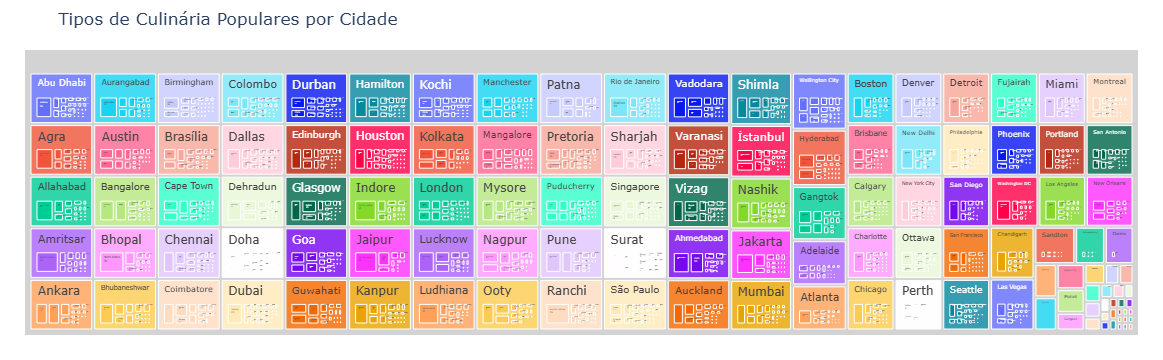

In [135]:
df_aux=df[['City', 'Cuisines']].groupby(['City','Cuisines'])['Cuisines'].count().to_frame('count').reset_index()

fig = px.treemap(df_aux, path=['City', 'Cuisines'], values='count', title='Tipos de Culinária Populares por Cidade')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.data[0].textinfo = 'label+text+value'
fig.show()

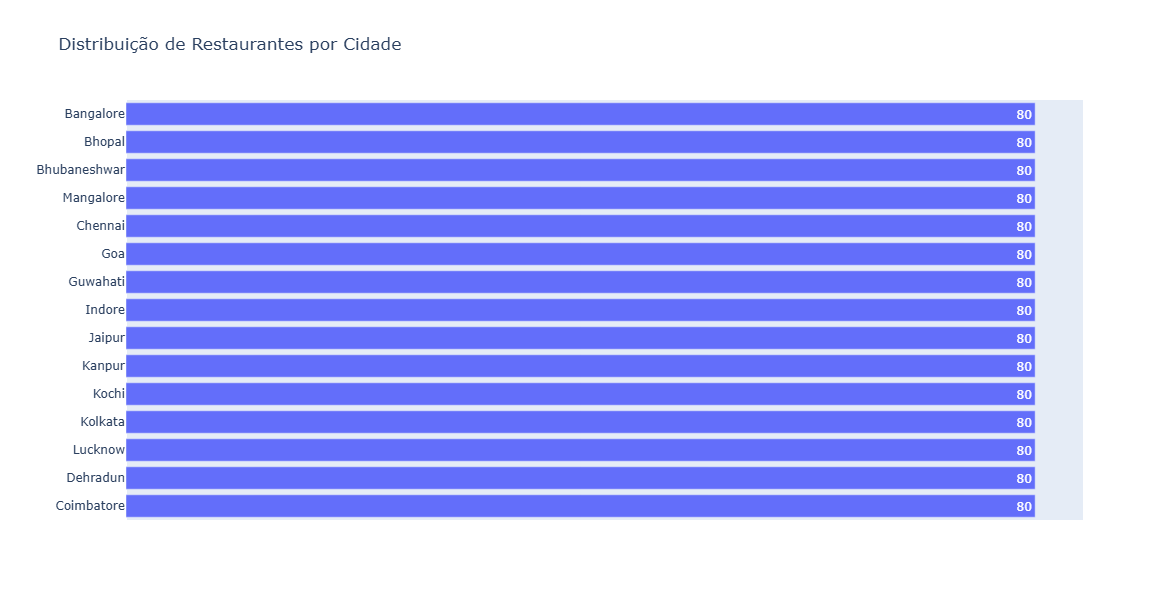

In [136]:
#cidades com mais restaurantes e mais bem avaliados
restaurantes_por_pais = df['City'].value_counts().reset_index().head(15)
fig = px.bar(
                restaurantes_por_pais, 
                x="count", 
                y="City", 
                text='count',
                title='Distribuição de Restaurantes por Cidade' ,
                
                labels={
                    'City': ' ',
                    'count' : ' '
                }
)
fig.update_traces(texttemplate='%{text}')
fig.update_xaxes(showticklabels=False,showgrid=False)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=600)
fig.show()

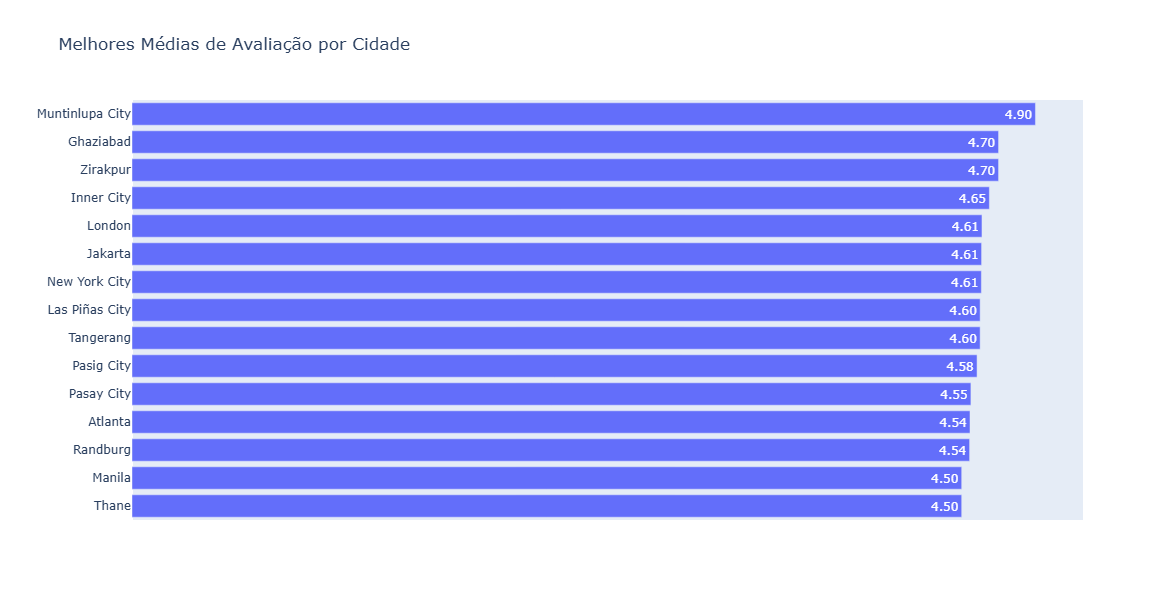

In [137]:
avaliacao_por_cidade = df[['City', 'Aggregate rating']].groupby(['City'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating', ascending=False).head(15)
fig = px.bar(
    avaliacao_por_cidade, 
    x="Aggregate rating", 
    y="City", 
    text='Aggregate rating',
    title='Melhores Médias de Avaliação por Cidade' ,
    labels={
                    'City': ' ',
                    'Aggregate rating' : ' '
    }
)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_xaxes(showticklabels=False,showgrid=False)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=600)

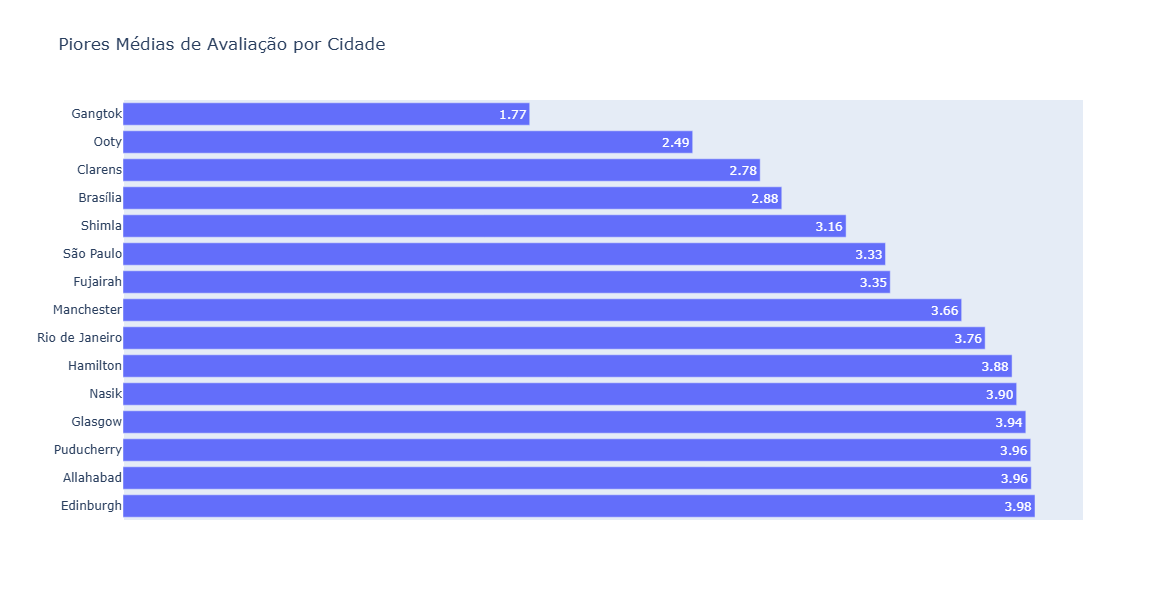

In [138]:
avaliacao_por_cidade = df[['City', 'Aggregate rating']].groupby(['City'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating').head(15)
fig = px.bar(
    avaliacao_por_cidade, 
    x="Aggregate rating", 
    y="City", 
    text='Aggregate rating',
    title='Piores Médias de Avaliação por Cidade' ,
    labels={
                    'City': ' ',
                    'Aggregate rating' : ' '
    }
)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_xaxes(showticklabels=False,showgrid=False)
fig.update_layout(yaxis={'categoryorder':'total descending'}, height=600)


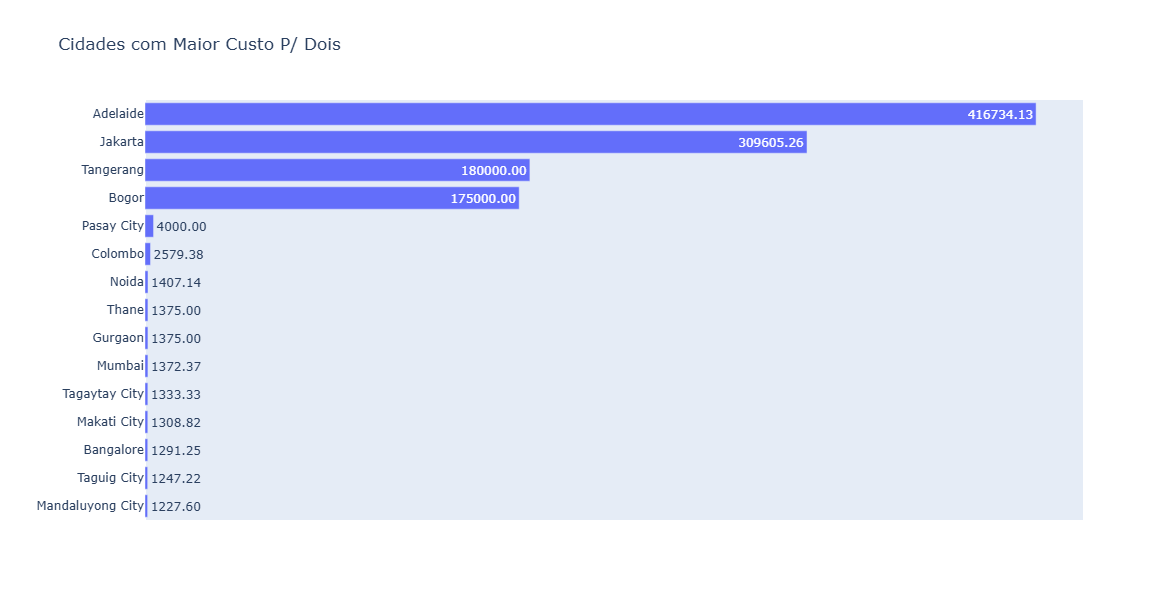

In [139]:
custo_pra_dois=df[['City','Average Cost for two']].groupby(['City'])['Average Cost for two'].mean().reset_index().sort_values('Average Cost for two', ascending=False).head(15)
fig = px.bar(
    custo_pra_dois, 
    x="Average Cost for two", 
    y="City", 
    text='Average Cost for two',
    title='Cidades com Maior Custo P/ Dois' ,
    labels={
                    'City': ' ',
                    'Average Cost for two' : ' '
    }
)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_xaxes(showticklabels=False,showgrid=False)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=600)

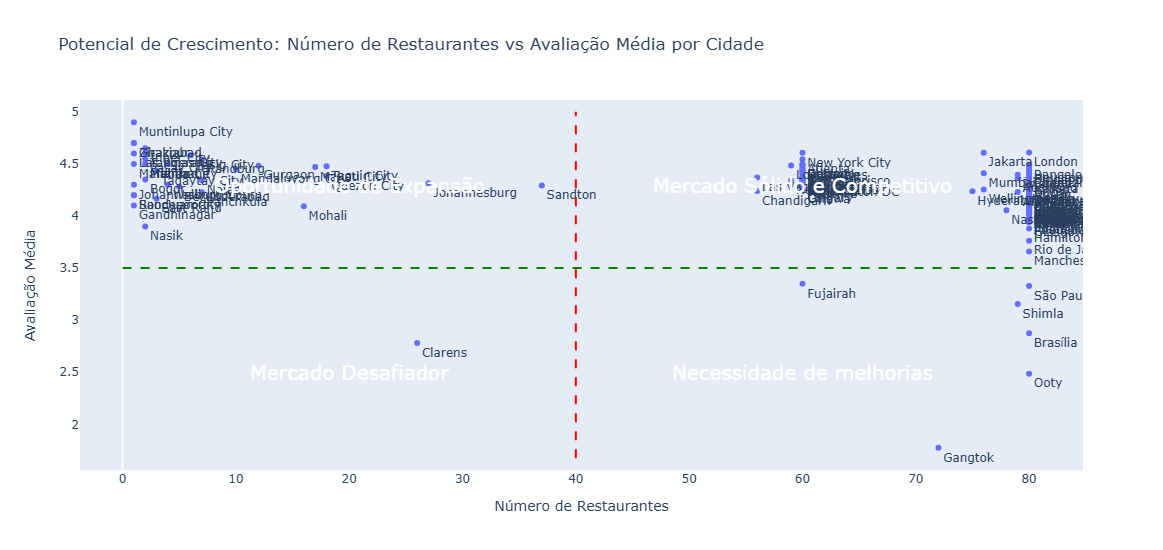

In [140]:
competicao=df[['City','Aggregate rating']].groupby(['City'])[['Aggregate rating','City']].agg({'City': 'count','Aggregate rating': 'mean'}).rename(columns={'City':'count'}).reset_index()
#fig = px.scatter(competicao, x="count", y="Aggregate rating")
competicao.columns = ['City', 'Number of Restaurants', 'Average Rating']
fig = px.scatter(
            competicao,
            x='Number of Restaurants',
            y='Average Rating',
            text='City',
            title='Potencial de Crescimento: Número de Restaurantes vs Avaliação Média por Cidade',
            labels={
                'Number of Restaurants': 'Número de Restaurantes',
                'Average Rating': 'Avaliação Média'
            },
            height=550,
            template='plotly',
            hover_data={'City': True}
)
fig.add_shape(
            type='line',
            x0=competicao['Number of Restaurants'].min()+39, x1=competicao['Number of Restaurants'].max()/2,
            y0=competicao['Average Rating'].min()-0.1, y1=competicao['Average Rating'].max() + 0.1,
            line=dict(dash='dash', color='Red')
)

fig.add_shape(
            type='line',
            x0=competicao['Number of Restaurants'].min()-1, x1=competicao['Number of Restaurants'].max() +1,
            y0=3.5, y1= 3.5,
            line=dict(dash='dash', color='Green')
)

fig.add_annotation(
            x=20, y=4.3,
            text='Oportunidade de Expansão', 
            showarrow=False, 
            font=dict(size=20, color="white")
)
fig.add_annotation(
            x=60, y=4.3,
            text='Mercado Sólido e Competitivo', 
            showarrow=False, 
            font=dict(size=20, color="white")
)
fig.add_annotation(
            x=20, y=2.5,
            text='Mercado Desafiador', 
            showarrow=False, 
            font=dict(size=20, color="white")
)
fig.add_annotation(
            x=60, y=2.5,
            text='Necessidade de melhorias', 
            showarrow=False, 
            arrowhead=1, 
            arrowsize=1, 
            arrowwidth=2, 
            font=dict(size=20, color="white")
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')

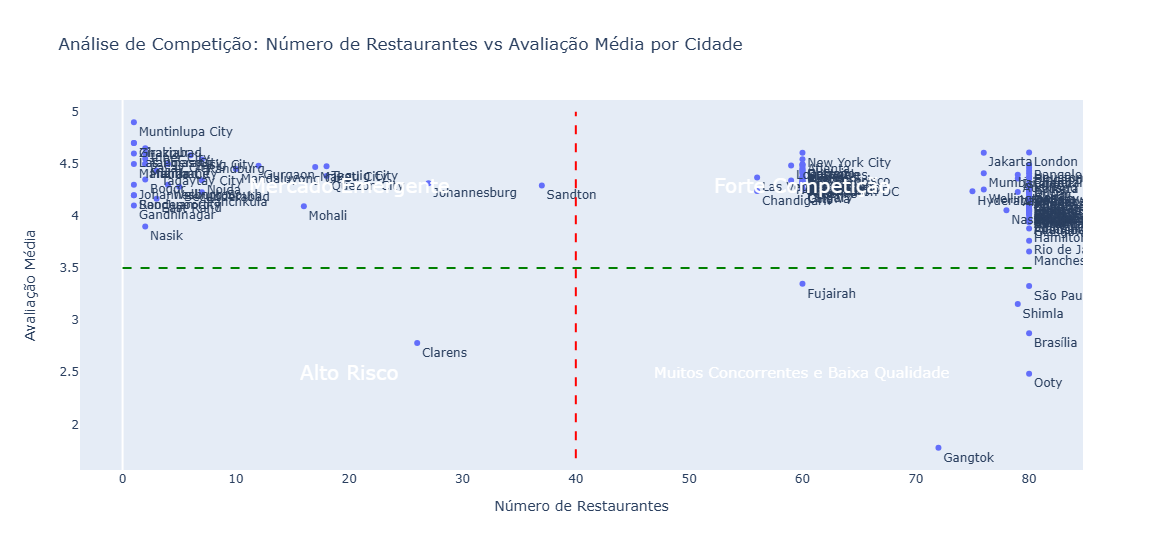

In [141]:
competicao=df[['City','Aggregate rating']].groupby(['City'])[['Aggregate rating','City']].agg({'City': 'count','Aggregate rating': 'mean'}).rename(columns={'City':'count'}).reset_index()
#fig = px.scatter(competicao, x="count", y="Aggregate rating")
competicao.columns = ['City', 'Number of Restaurants', 'Average Rating']
fig = px.scatter(
            competicao,
            x='Number of Restaurants',
            y='Average Rating',
            text='City',
            title='Análise de Competição: Número de Restaurantes vs Avaliação Média por Cidade',
            labels={
                'Number of Restaurants': 'Número de Restaurantes',
                'Average Rating': 'Avaliação Média'
            },
            height=550,
            template='plotly',
            hover_data={'City': True}
)
fig.add_shape(
            type='line',
            x0=competicao['Number of Restaurants'].min()+39, x1=competicao['Number of Restaurants'].max()/2,
            y0=competicao['Average Rating'].min()-0.1, y1=competicao['Average Rating'].max() + 0.1,
            line=dict(dash='dash', color='Red')
)

fig.add_shape(
            type='line',
            x0=competicao['Number of Restaurants'].min()-1, x1=competicao['Number of Restaurants'].max() +1,
            y0=3.5, y1= 3.5,
            line=dict(dash='dash', color='Green')
)

fig.add_annotation(
            x=20, y=4.3,
            text='Mercado Emergente', 
            showarrow=False, 
            font=dict(size=20, color="white")
)
fig.add_annotation(
            x=60, y=4.3,
            text='Forte Competição', 
            showarrow=False, 
            font=dict(size=20, color="white")
)
fig.add_annotation(
            x=20, y=2.5,
            text='Alto Risco', 
            showarrow=False, 
            font=dict(size=20, color="white")
)
fig.add_annotation(
            x=60, y=2.5,
            text='Muitos Concorrentes e Baixa Qualidade', 
            showarrow=False, 
            arrowhead=1, 
            arrowsize=1, 
            arrowwidth=2, 
            font=dict(size=15, color="white")
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')

In [142]:
#df[['City','Aggregate rating','Average Cost for two']].groupby(['City'])[['Aggregate rating','Average Cost for two']].mean().reset_index()

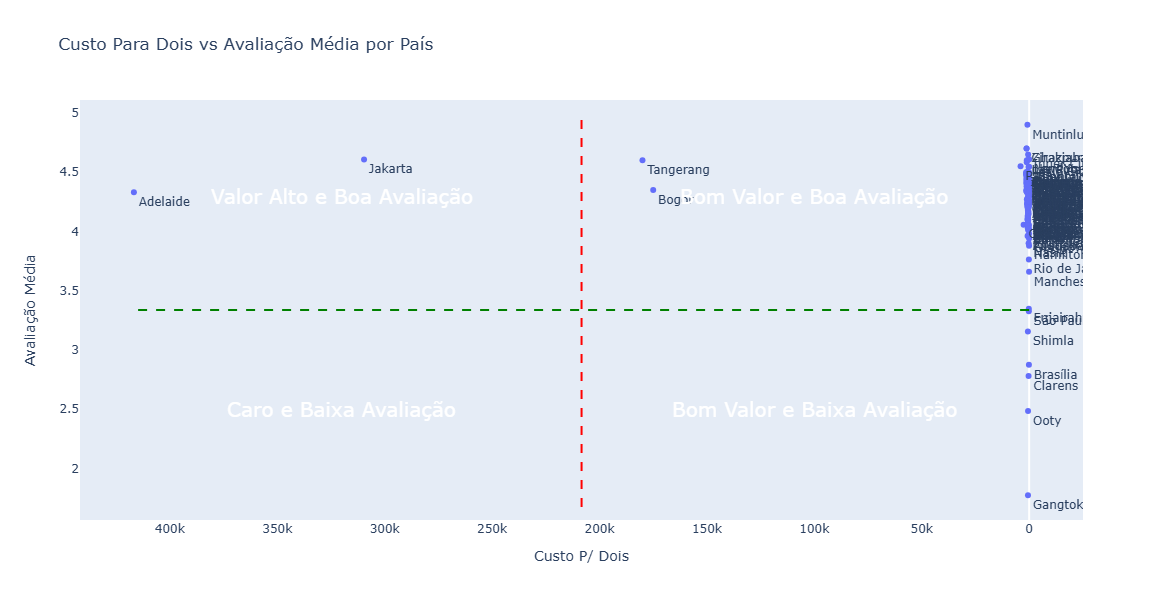

In [143]:
custo_vs_avaliação_por_cidade=df[['City','Aggregate rating','Average Cost for two']].groupby(['City'])[['Aggregate rating','Average Cost for two']].mean().reset_index()

fig = px.scatter(
            custo_vs_avaliação_por_cidade, 
            x="Average Cost for two", 
            y="Aggregate rating",
            text='City',
            title='Custo Para Dois vs Avaliação Média por País',
            labels={
                'Average Cost for two': 'Custo P/ Dois',
                'Aggregate rating': 'Avaliação Média'
            },
            height=600,
            template='plotly',
            hover_data={'City': True}
)
fig.add_shape(
            type='line',
            x0=(custo_vs_avaliação_por_cidade['Average Cost for two'].max() / 2)-custo_vs_avaliação_por_cidade['Average Cost for two'].min(), x1=custo_vs_avaliação_por_cidade['Average Cost for two'].max() / 2,
            y0=custo_vs_avaliação_por_cidade['Aggregate rating'].min()- 0.1, y1=custo_vs_avaliação_por_cidade['Aggregate rating'].max()+0.1,
            line=dict(dash='dash', color='Red'),
        )

fig.add_shape(
            type='line',
            x0=custo_vs_avaliação_por_cidade['Average Cost for two'].min(), x1=custo_vs_avaliação_por_cidade['Average Cost for two'].max()+1000,
            y0=(custo_vs_avaliação_por_cidade['Aggregate rating'].max() + custo_vs_avaliação_por_cidade['Aggregate rating'].min()) / 2, y1=(custo_vs_avaliação_por_cidade['Aggregate rating'].max() + custo_vs_avaliação_por_cidade['Aggregate rating'].min()) / 2,
            line=dict(dash='dash', color='Green'),
        )
fig.add_annotation(
            x=320000, y=4.3,
            text='Valor Alto e Boa Avaliação', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(            
            x=100000, y=4.3,
            text='Bom Valor e Boa Avaliação', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=320000, y=2.5,
            text='Caro e Baixa Avaliação', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            
            x=100000, y=2.5,
            text='Bom Valor e Baixa Avaliação', 
            showarrow=False, 
            arrowhead=1, 
            arrowsize=1, 
            arrowwidth=2, 
            font=dict(size=20, color="white")
        )
fig.update_xaxes(showgrid=False, autorange='reversed')
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')

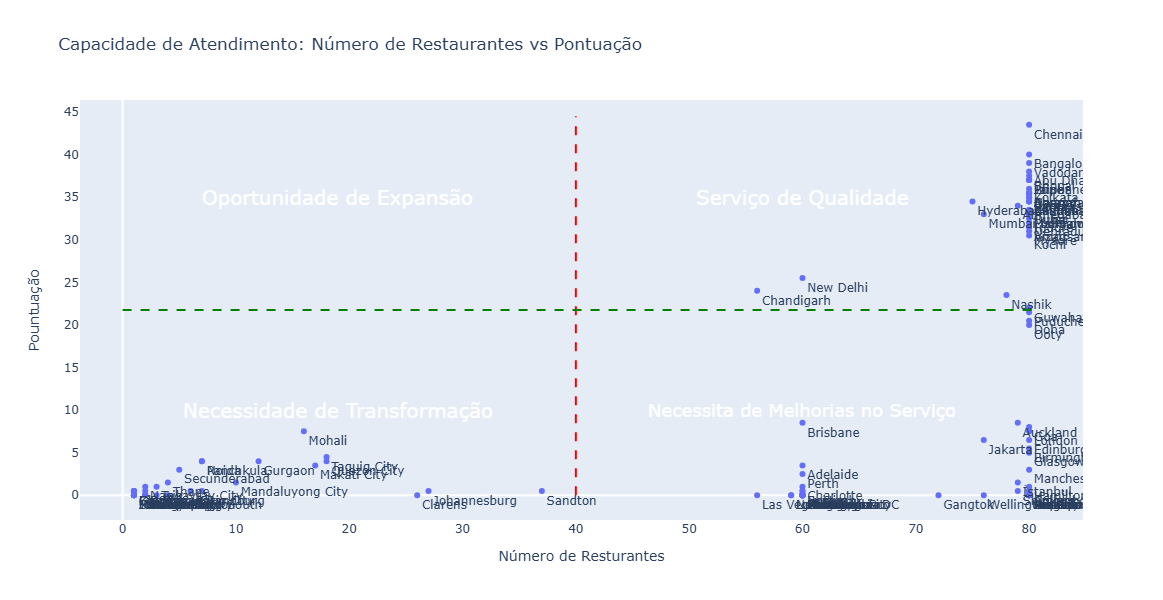

In [144]:
capacidade_atendimento= df[['City','Has Table booking','Has Online delivery']].groupby(['City'])[['Has Table booking','Has Online delivery','City']].agg({'City': 'count','Has Table booking': 'sum','Has Online delivery': 'sum'}).rename(columns={'City':'count'}).reset_index()
capacidade_atendimento['indice'] = (capacidade_atendimento['Has Table booking'] * 0.5 + capacidade_atendimento['Has Online delivery'] * 0.5)

fig = px.scatter(
            capacidade_atendimento, 
            x="count", 
            y="indice",
            text='City',
            title='Capacidade de Atendimento: Número de Restaurantes vs Pontuação',
            labels={
                'count': 'Número de Resturantes',
                'indice': 'Pountuação'
            },
            height=600,
            template='plotly',
            hover_data={'City': True}
        )
fig.add_shape(
            type='line',
            x0=capacidade_atendimento['count'].max() / 2 , x1=capacidade_atendimento['count'].max() / 2,
            y0=capacidade_atendimento['indice'].min(), y1=capacidade_atendimento['indice'].max() +1,
            line=dict(dash='dash', color='Red'),
        )

fig.add_shape(
            type='line',
            x0=capacidade_atendimento['count'].min()-1, x1=capacidade_atendimento['count'].max() +1,
            y0=capacidade_atendimento['indice'].max() / 2, y1=capacidade_atendimento['indice'].max() / 2,
            line=dict(dash='dash', color='Green'),
        )
fig.add_annotation(
            x=19, y=35,
            text='Oportunidade de Expansão', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=60, y=35,
            text='Serviço de Qualidade', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=19, y=10,
            text='Necessidade de Transformação', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=60, y=10,
            text='Necessita de Melhorias no Serviço', 
            showarrow=False, 
            font=dict(size=18, color="white")
        )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')

In [145]:


df[['City', 'Aggregate rating']].groupby(['City'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating', ascending=False).head(15)



City  Aggregate rating
74   Muntinlupa City          4.900000
123         Zirakpur          4.700000
40         Ghaziabad          4.700000
49        Inner City          4.650000
59            London          4.610000
51           Jakarta          4.607895
81     New York City          4.606667
115        Tangerang          4.600000
57    Las Piñas City          4.600000
87        Pasig City          4.583333
86        Pasay City          4.550000
7            Atlanta          4.545000
98          Randburg          4.542857
116            Thane          4.500000
67            Manila          4.500000

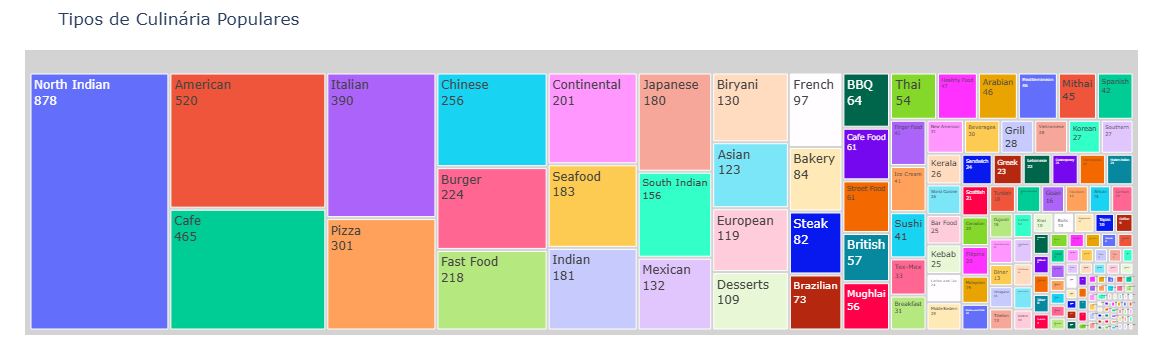

In [146]:
df_aux=df['Cuisines'].value_counts().reset_index()
fig = px.treemap(df_aux, path=['Cuisines'], values='count', title='Tipos de Culinária Populares')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.data[0].textinfo = 'label+text+value'
fig.show()

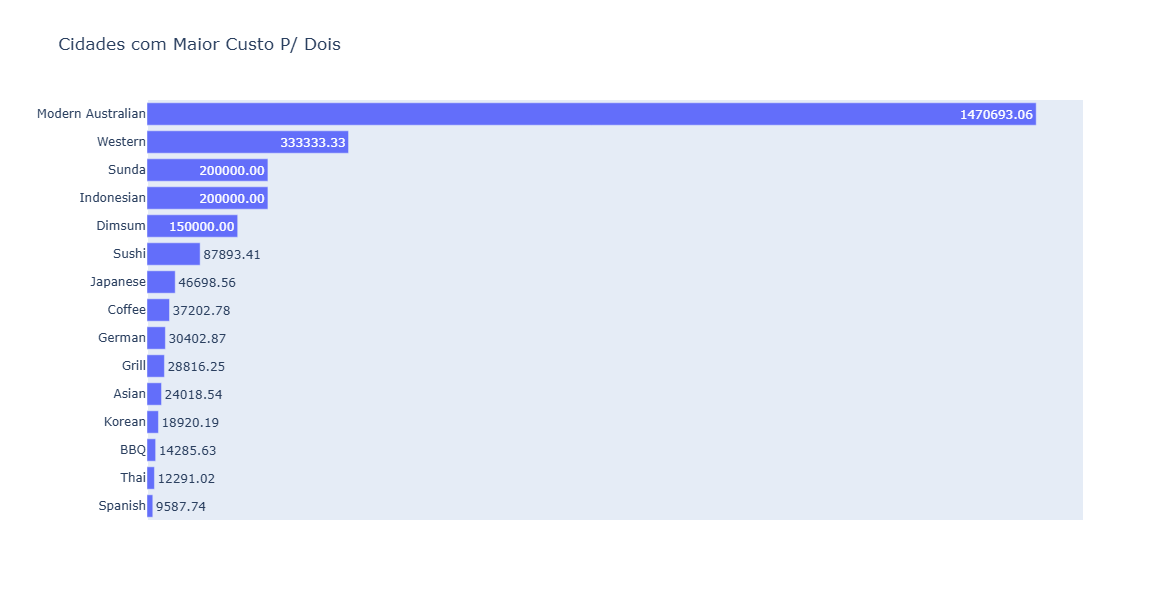

In [147]:
custo_pra_dois=df[['Cuisines','Average Cost for two']].groupby(['Cuisines'])['Average Cost for two'].mean().reset_index().sort_values('Average Cost for two', ascending=False).head(15)

fig = px.bar(
    custo_pra_dois, 
    x="Average Cost for two", 
    y="Cuisines", 
    text='Average Cost for two',
    title='Cidades com Maior Custo P/ Dois' ,
    labels={
                    'Cuisines': ' ',
                    'Average Cost for two' : ' '
    }
)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_xaxes(showticklabels=False,showgrid=False)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=600)

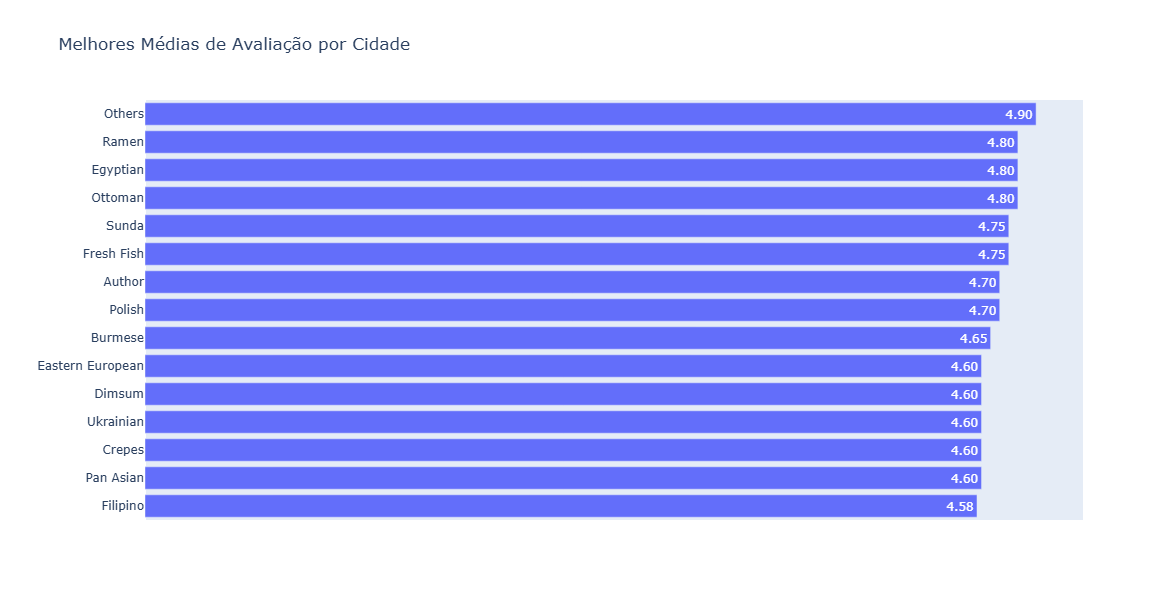

In [148]:
avaliacao_por_culinaria=df[['Cuisines', 'Aggregate rating']].groupby(['Cuisines'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating', ascending=False).head(15)
fig = px.bar(
    avaliacao_por_culinaria, 
    x="Aggregate rating", 
    y="Cuisines", 
    text='Aggregate rating',
    title='Melhores Médias de Avaliação por Cidade' ,
    labels={
                    'Cuisines': ' ',
                    'Aggregate rating' : ' '
    }
)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_xaxes(showticklabels=False,showgrid=False)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, height=600)

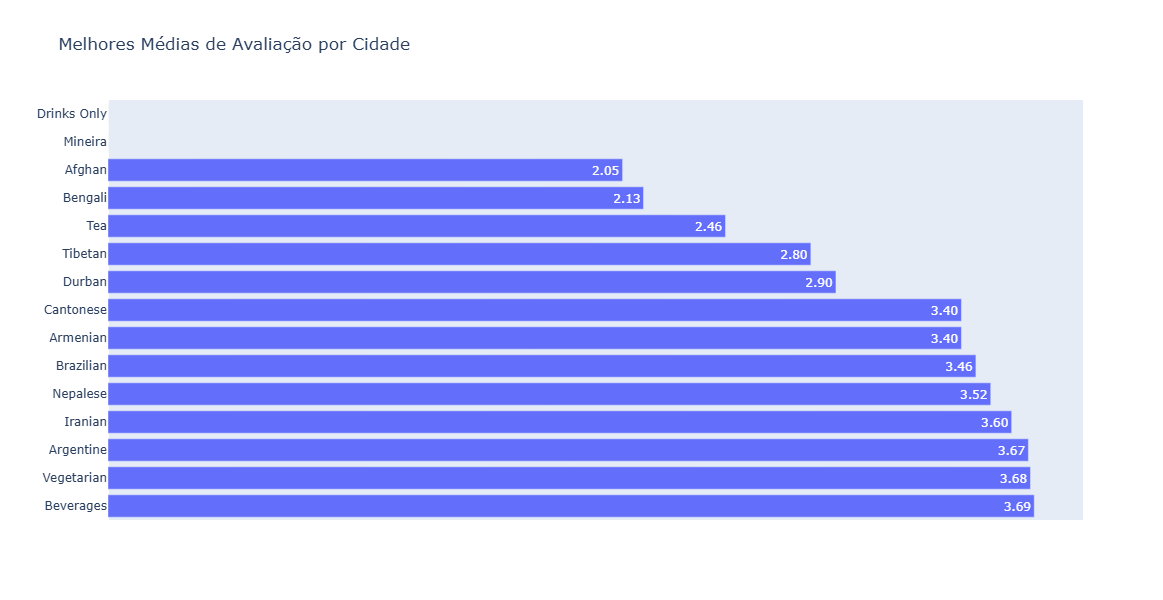

In [149]:
avaliacao_por_culinaria=df[['Cuisines', 'Aggregate rating']].groupby(['Cuisines'])['Aggregate rating'].mean().reset_index().sort_values('Aggregate rating').head(15)

fig = px.bar(
    avaliacao_por_culinaria, 
    x="Aggregate rating", 
    y="Cuisines", 
    text='Aggregate rating',
    title='Melhores Médias de Avaliação por Cidade' ,
    labels={
                    'Cuisines': ' ',
                    'Aggregate rating' : ' '
    }
)
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_xaxes(showticklabels=False,showgrid=False)
fig.update_layout(yaxis={'categoryorder':'total descending'}, height=600)

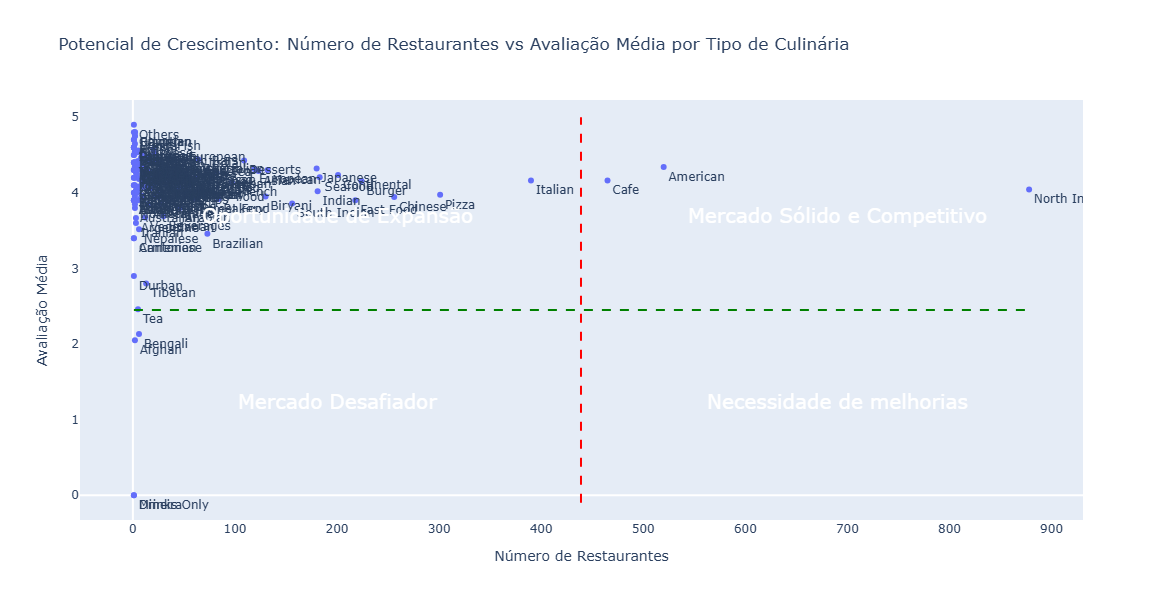

In [150]:
crescimento=df[['Cuisines','Aggregate rating']].groupby(['Cuisines'])[['Aggregate rating','Cuisines']].agg({'Cuisines': 'count','Aggregate rating': 'mean'}).rename(columns={'Cuisines':'count'}).reset_index()
crescimento.columns = ['Cuisines', 'Number of Restaurants', 'Average Rating']
fig = px.scatter(
                    crescimento,
                    x='Number of Restaurants',
                    y='Average Rating',
                    text='Cuisines',
                    title='Potencial de Crescimento: Número de Restaurantes vs Avaliação Média por Tipo de Culinária',
                    labels={
                        'Number of Restaurants': 'Número de Restaurantes',
                        'Average Rating': 'Avaliação Média'
                    },
                    height=600,
                    template='plotly',
                    hover_data={'Cuisines': True}
        )
fig.add_shape(
                    type='line',
                    x0=crescimento['Number of Restaurants'].max()/2, x1=crescimento['Number of Restaurants'].max()/2,
                    y0=crescimento['Average Rating'].min()-0.1, y1=crescimento['Average Rating'].max() + 0.1,
                    line=dict(dash='dash', color='Red')
        )

fig.add_shape(
                    type='line',
                    x0=crescimento['Number of Restaurants'].min(), x1=crescimento['Number of Restaurants'].max() ,
                    y0=crescimento['Average Rating'].max()/2, y1= crescimento['Average Rating'].max()/2,
                    line=dict(dash='dash', color='Green')
        )
fig.add_annotation(
                    x=200, y=3.7,
                    text='Oportunidade de Expansão', 
                    showarrow=False, 
                    font=dict(size=20, color="white")
        )
fig.add_annotation(
                    x=690, y=3.7,
                    text='Mercado Sólido e Competitivo', 
                    showarrow=False, 
                    font=dict(size=20, color="white")
        )
fig.add_annotation(
                    x=200, y=1.25,
                    text='Mercado Desafiador', 
                    showarrow=False, 
                    font=dict(size=20, color="white")
        )
fig.add_annotation(
                    x=690, y=1.25,
                    text='Necessidade de melhorias', 
                    showarrow=False, 
                    font=dict(size=20, color="white")
        )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')

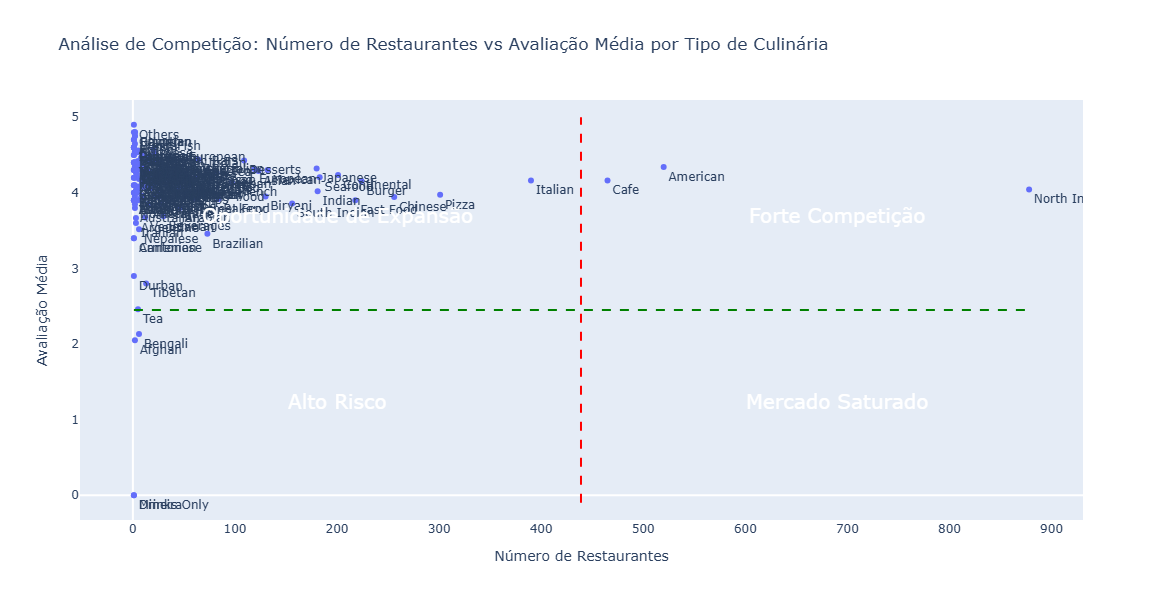

In [151]:
competicao=df[['Cuisines','Aggregate rating']].groupby(['Cuisines'])[['Aggregate rating','Cuisines']].agg({'Cuisines': 'count','Aggregate rating': 'mean'}).rename(columns={'Cuisines':'count'}).reset_index()
competicao.columns = ['Cuisines', 'Number of Restaurants', 'Average Rating']
fig = px.scatter(
                    competicao,
                    x='Number of Restaurants',
                    y='Average Rating',
                    text='Cuisines',
                    title='Análise de Competição: Número de Restaurantes vs Avaliação Média por Tipo de Culinária',
                    labels={
                        'Number of Restaurants': 'Número de Restaurantes',
                        'Average Rating': 'Avaliação Média'
                    },
                    height=600,
                    template='plotly',
                    hover_data={'Cuisines': True}
        )
fig.add_shape(
                    type='line',
                    x0=competicao['Number of Restaurants'].max()/2, x1=competicao['Number of Restaurants'].max()/2,
                    y0=competicao['Average Rating'].min()-0.1, y1=competicao['Average Rating'].max() + 0.1,
                    line=dict(dash='dash', color='Red')
        )

fig.add_shape(
                    type='line',
                    x0=competicao['Number of Restaurants'].min(), x1=competicao['Number of Restaurants'].max() ,
                    y0=competicao['Average Rating'].max()/2, y1= competicao['Average Rating'].max()/2,
                    line=dict(dash='dash', color='Green')
        )
fig.add_annotation(
                    x=200, y=3.7,
                    text='Oportunidade de Expansão', 
                    showarrow=False, 
                    font=dict(size=20, color="white")
        )
fig.add_annotation(
                    x=690, y=3.7,
                    text='Forte Competição', 
                    showarrow=False, 
                    font=dict(size=20, color="white")
        )
fig.add_annotation(
                    x=200, y=1.25,
                    text='Alto Risco', 
                    showarrow=False, 
                    font=dict(size=20, color="white")
        )
fig.add_annotation(
                    x=690, y=1.25,
                    text='Mercado Saturado', 
                    showarrow=False, 
                    font=dict(size=20, color="white")
        )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')

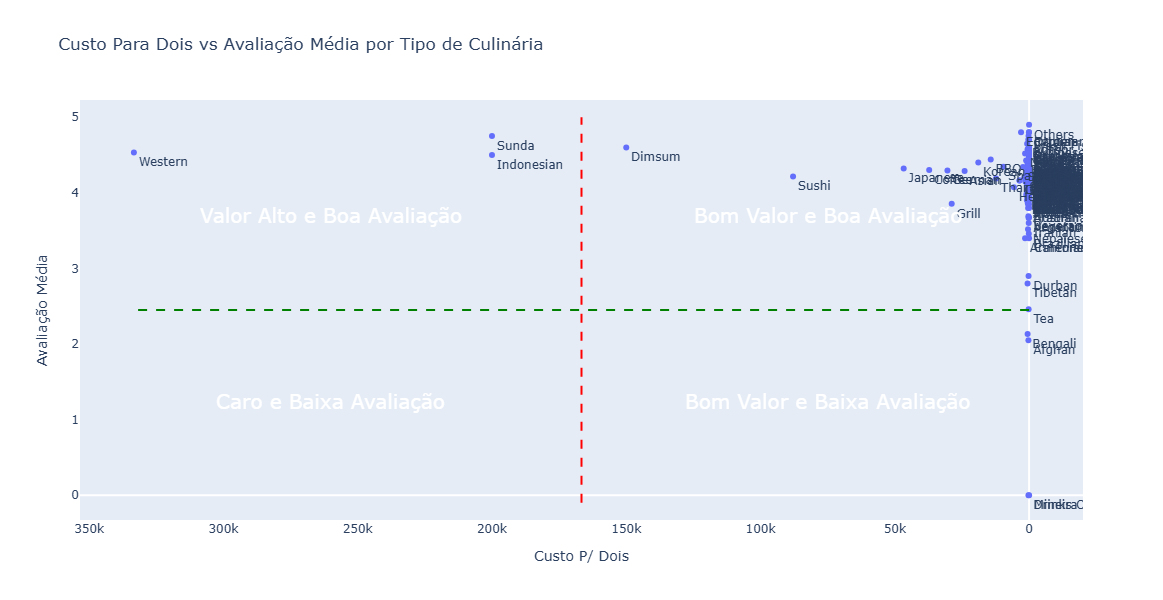

In [152]:
custo_vs_avaliação_por_cidade=df[['Cuisines','Aggregate rating','Average Cost for two']].groupby(['Cuisines'])[['Aggregate rating','Average Cost for two']].mean().reset_index()
custo_vs_avaliação_por_cidade.drop(custo_vs_avaliação_por_cidade.loc[custo_vs_avaliação_por_cidade['Average Cost for two'] == custo_vs_avaliação_por_cidade['Average Cost for two'].max()].index, inplace=True)
fig = px.scatter(
                custo_vs_avaliação_por_cidade, 
                x="Average Cost for two", 
                y="Aggregate rating",
                text='Cuisines',
                title='Custo Para Dois vs Avaliação Média por Tipo de Culinária',
                labels={
                        'Average Cost for two': 'Custo P/ Dois',
                        'Aggregate rating': 'Avaliação Média'
                    },
                height=600,
                template='plotly',
                hover_data={'Cuisines': True}
)
fig.add_shape(
            type='line',
            x0=(custo_vs_avaliação_por_cidade['Average Cost for two'].max() / 2)-custo_vs_avaliação_por_cidade['Average Cost for two'].min(), x1=custo_vs_avaliação_por_cidade['Average Cost for two'].max() / 2,
            y0=custo_vs_avaliação_por_cidade['Aggregate rating'].min()- 0.1, y1=custo_vs_avaliação_por_cidade['Aggregate rating'].max()+0.1,
            line=dict(dash='dash', color='Red'),
)
fig.add_shape(
            type='line',
            x0=custo_vs_avaliação_por_cidade['Average Cost for two'].min(), x1=custo_vs_avaliação_por_cidade['Average Cost for two'].max()+1000,
            y0=(custo_vs_avaliação_por_cidade['Aggregate rating'].max() + custo_vs_avaliação_por_cidade['Aggregate rating'].min()) / 2, y1=(custo_vs_avaliação_por_cidade['Aggregate rating'].max() + custo_vs_avaliação_por_cidade['Aggregate rating'].min()) / 2,
            line=dict(dash='dash', color='Green'),
)

fig.add_annotation(
            x=260000, y=3.7,
            text='Valor Alto e Boa Avaliação', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=75000, y=3.7,
            text='Bom Valor e Boa Avaliação', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=260000, y=1.25,
            text='Caro e Baixa Avaliação', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=75000, y=1.25,
            text='Bom Valor e Baixa Avaliação',  
            showarrow=False,
            font=dict(size=20, color="white")
        )
fig.update_xaxes(showgrid=False, autorange='reversed')
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')

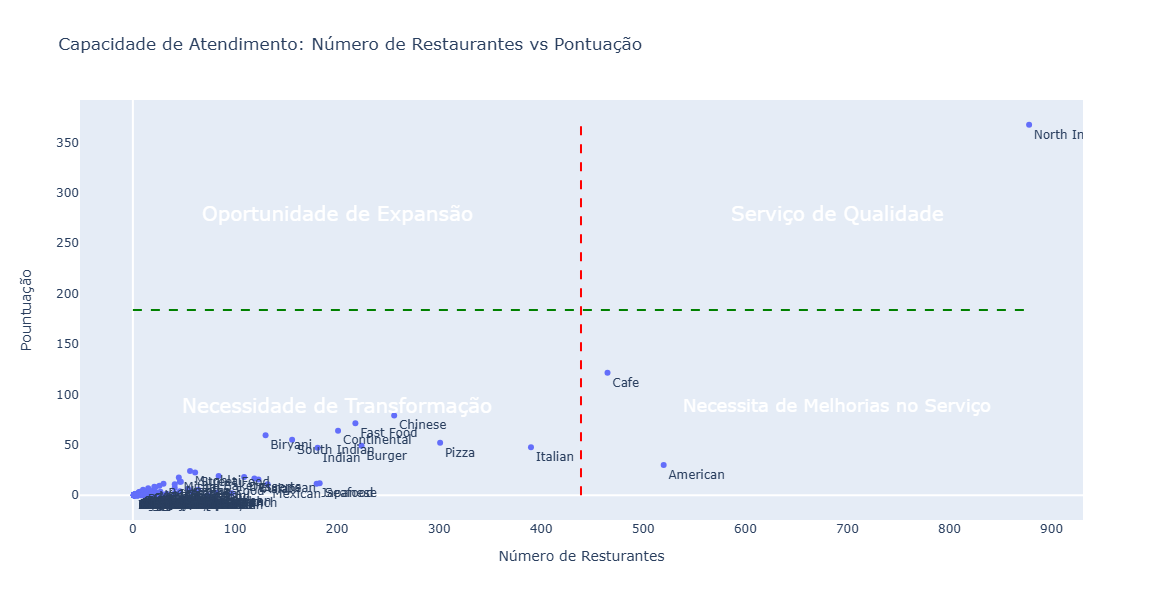

In [153]:
capacidade_atendimento= df[['Cuisines','Has Table booking','Has Online delivery']].groupby(['Cuisines'])[['Has Table booking','Has Online delivery','Cuisines']].agg({'Cuisines': 'count','Has Table booking': 'sum','Has Online delivery': 'sum'}).rename(columns={'Cuisines':'count'}).reset_index()
capacidade_atendimento['indice'] = (capacidade_atendimento['Has Table booking'] * 0.5 + capacidade_atendimento['Has Online delivery'] * 0.5)
fig = px.scatter(
            capacidade_atendimento, 
            x="count", 
            y="indice",
            text='Cuisines',
            title='Capacidade de Atendimento: Número de Restaurantes vs Pontuação',
            labels={
                'count': 'Número de Resturantes',
                'indice': 'Pountuação'
            },
            height=600,
            template='plotly',
            hover_data={'Cuisines': True}
)
fig.add_shape(
            type='line',
            x0=capacidade_atendimento['count'].max() / 2 , x1=capacidade_atendimento['count'].max() / 2,
            y0=capacidade_atendimento['indice'].min(), y1=capacidade_atendimento['indice'].max() +1,
            line=dict(dash='dash', color='Red'),
)

fig.add_shape(
            type='line',
            x0=capacidade_atendimento['count'].min()-1, x1=capacidade_atendimento['count'].max() +1,
            y0=capacidade_atendimento['indice'].max() / 2, y1=capacidade_atendimento['indice'].max() / 2,
            line=dict(dash='dash', color='Green'),
)
fig.add_annotation(
            x=200, y=280,
            text='Oportunidade de Expansão', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=690, y=280,
            text='Serviço de Qualidade', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=200, y=90,
            text='Necessidade de Transformação', 
            showarrow=False, 
            font=dict(size=20, color="white")
        )
fig.add_annotation(
            x=690, y=90,
            text='Necessita de Melhorias no Serviço', 
            showarrow=False, 
            font=dict(size=18, color="white")
        )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(textposition='bottom right')